# Task 1: Data Analysis for earnings.csv
This notebook analyzes the earnings.csv file to check for missing data and count observations.


In [3]:
import pandas as pd

df = pd.read_csv('earnings.csv', sep=';')

print("Basic information about the dataframe:")
print(f"Number of observations (rows): {len(df)}")


Basic information about the dataframe:
Number of observations (rows): 11000


In [4]:
missing_values = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing Values': missing_values,
    'Percentage Missing': missing_percentage.round(2)
})

total_missing = df.isnull().sum().sum()
if total_missing == 0:
    print("The dataset has no missing values.")
else:
    print(f"The dataset has {total_missing} missing values across all columns.")


The dataset has no missing values.


There are 11 000 observations in the dataset and no missing values. The dataset contains a total of 14 variables (one additional column contains an ID number). Of these variables:
* Five are qualitative (rows 6–10): sector, section_07, sex, education, contract
* Nine are quantitative (rows 2–5 and 11–15): base, bonus, overtime_pay, other, age, duration_total, duration_entity, duration_nominal, duration_overtime


In [5]:
print("\n--- Descriptive Statistics for Qualitative Variables ---\n")

qualitative_vars = ['sector', 'section_07', 'sex', 'education', 'contract']

sex_dict = {
    1: 'man',
    2: 'woman'
}

sector_dict = {
    1: 'public',
    2: 'private'
}

section_07_dict = {
    1: 'Public Administration and Defence; Compulsory Social Security',
    2: 'Education',
    3: 'Human Health and Social Work Activities'
}

contract_dict = {
    1: 'for an indefinite period',
    2: 'for a definite period'
}

education_dict = {
    1: 'doctorate',
    2: 'higher',
    3: 'post-secondary',
    4: 'secondary',
    5: 'basic vocational',
    6: 'middle school and below'
}

for var in qualitative_vars:
    print(f"\nFrequency table for {var}:")
    freq_table = df[var].value_counts().reset_index()
    freq_table.columns = [var, 'Count']
    freq_table['Percentage'] = (freq_table['Count'] / len(df) * 100).round(2)

    if var == 'sex':
        freq_table['Label'] = freq_table['sex'].map(sex_dict)
    elif var == 'sector':
        freq_table['Label'] = freq_table['sector'].map(sector_dict)
    elif var == 'section_07':
        freq_table['Label'] = freq_table['section_07'].map(section_07_dict)
    elif var == 'education':
        freq_table['Label'] = freq_table['education'].map(education_dict)
    elif var == 'contract':
        freq_table['Label'] = freq_table['contract'].map(contract_dict)

    print(freq_table)



--- Descriptive Statistics for Qualitative Variables ---


Frequency table for sector:
   sector  Count  Percentage    Label
0       1  10548       95.89   public
1       2    452        4.11  private

Frequency table for section_07:
   section_07  Count  Percentage  \
0           2   5867       53.34   
1           3   2732       24.84   
2           1   2401       21.83   

                                               Label  
0                                          Education  
1            Human Health and Social Work Activities  
2  Public Administration and Defence; Compulsory ...  

Frequency table for sex:
   sex  Count  Percentage  Label
0    2   8289       75.35  woman
1    1   2711       24.65    man

Frequency table for education:
   education  Count  Percentage                    Label
0          2   6633       60.30                   higher
1          4   1983       18.03                secondary
2          5    906        8.24         basic vocational
3          3   

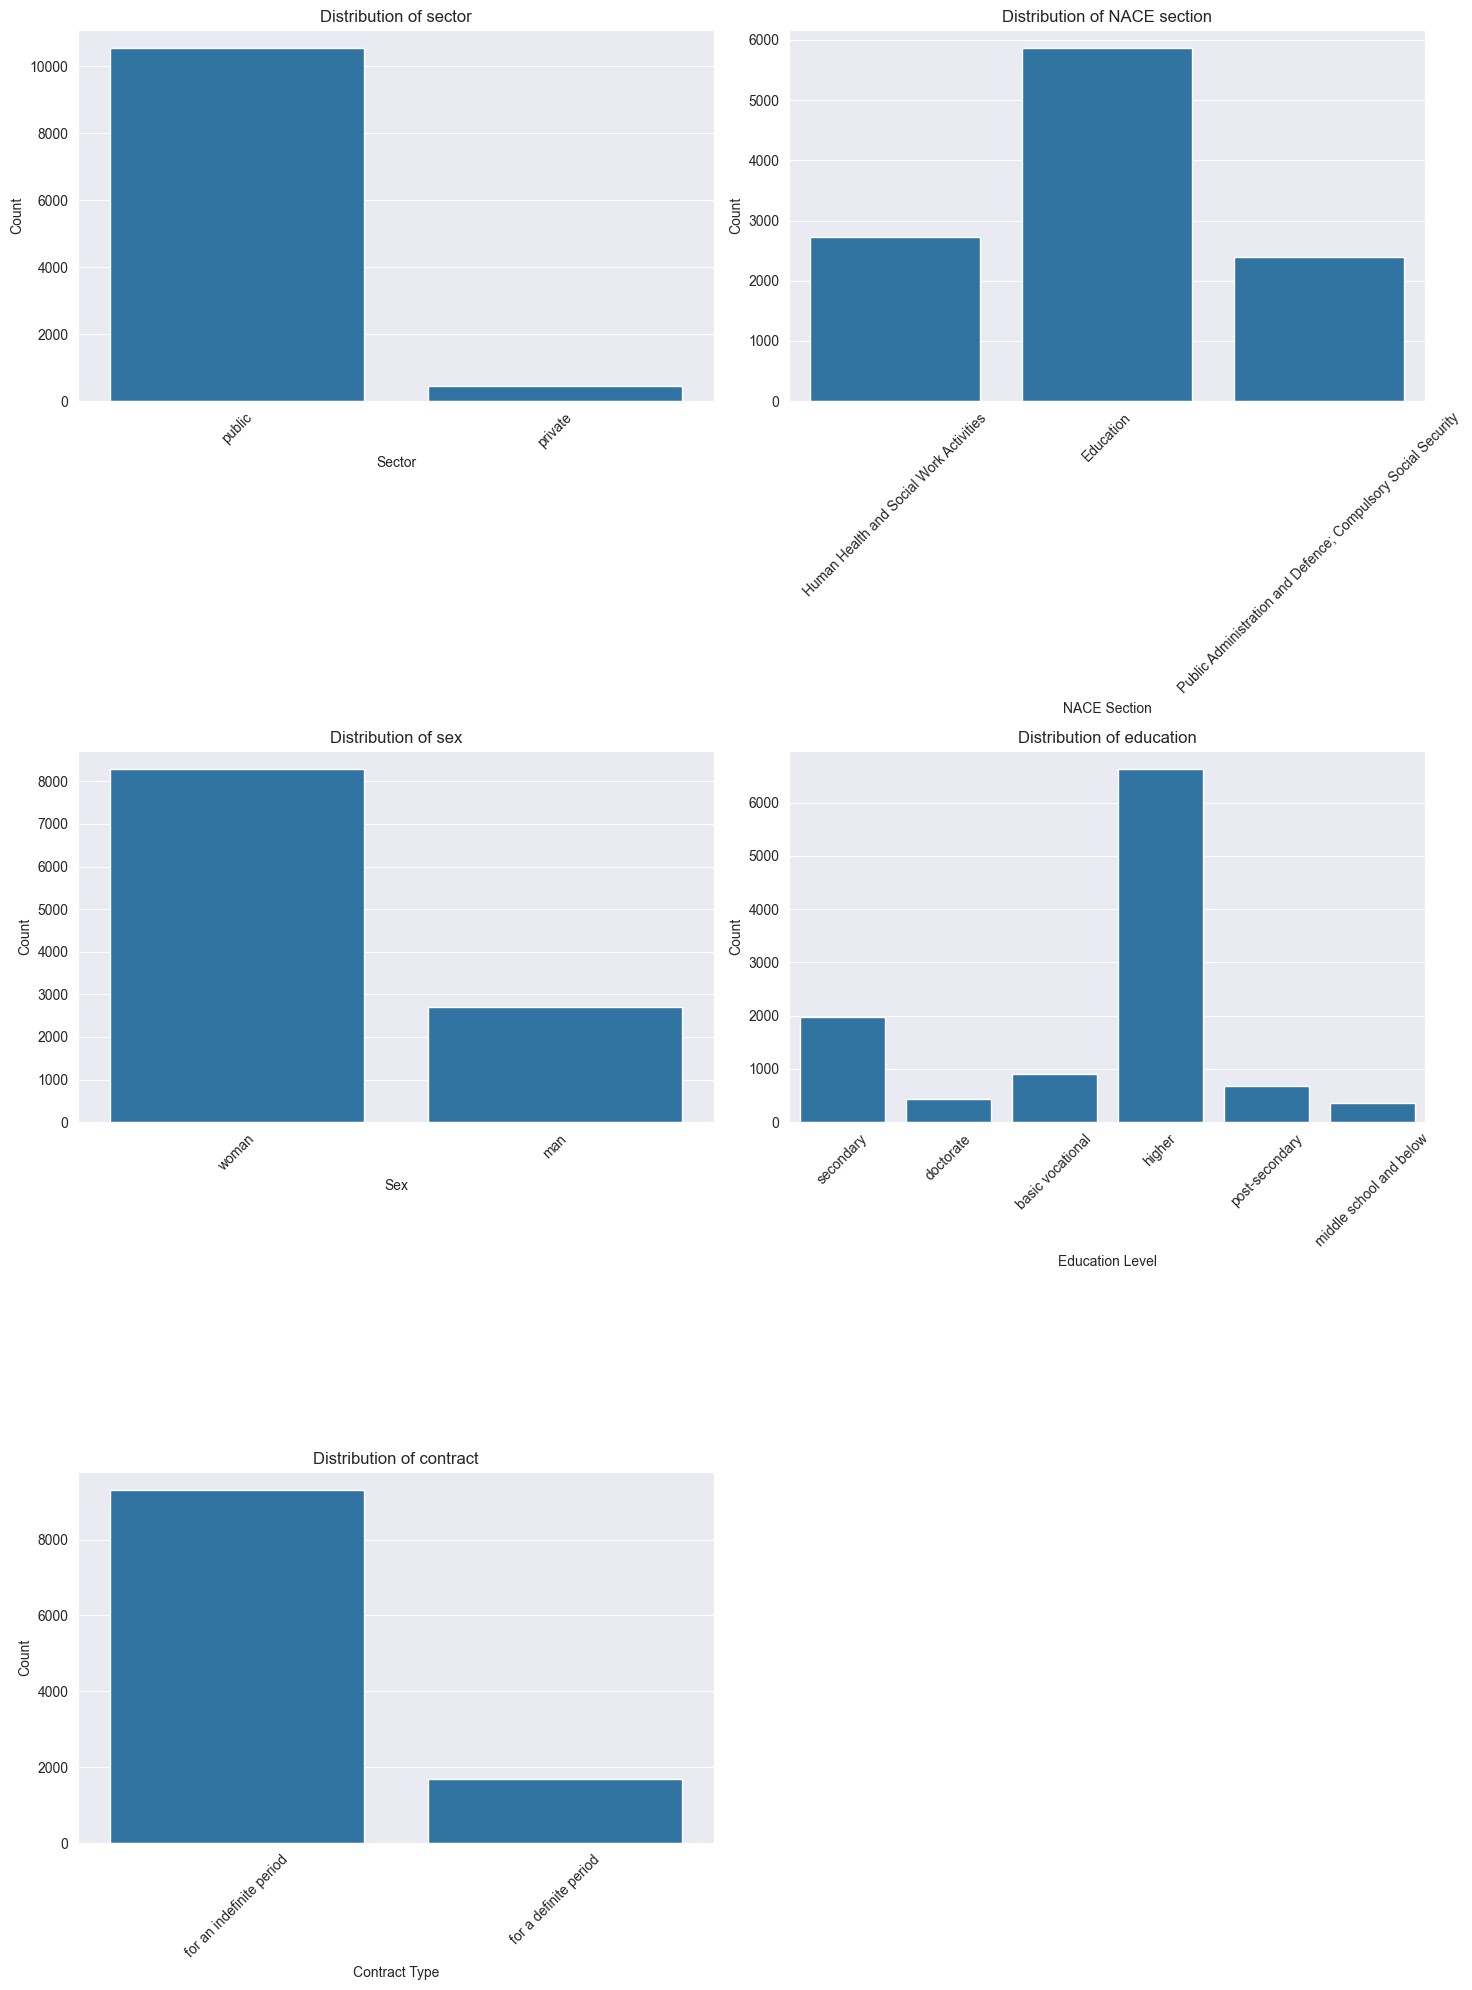

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 20))
for i, var in enumerate(qualitative_vars):
    plt.subplot(3, 2, i+1)

    df_plot = df.copy()

    if var == 'sex':
        df_plot['sex_label'] = df_plot['sex'].map(sex_dict)
        sns.countplot(x='sex_label', data=df_plot)
        plt.title(f'Distribution of sex')
        plt.xlabel('Sex')
    elif var == 'sector':
        df_plot['sector_label'] = df_plot['sector'].map(sector_dict)
        sns.countplot(x='sector_label', data=df_plot)
        plt.title(f'Distribution of sector')
        plt.xlabel('Sector')
    elif var == 'section_07':
        df_plot['section_07_label'] = df_plot['section_07'].map(section_07_dict)
        sns.countplot(x='section_07_label', data=df_plot)
        plt.title(f'Distribution of NACE section')
        plt.xlabel('NACE Section')
    elif var == 'education':
        df_plot['education_label'] = df_plot['education'].map(education_dict)
        sns.countplot(x='education_label', data=df_plot)
        plt.title(f'Distribution of education')
        plt.xlabel('Education Level')
    elif var == 'contract':
        df_plot['contract_label'] = df_plot['contract'].map(contract_dict)
        sns.countplot(x='contract_label', data=df_plot)
        plt.title(f'Distribution of contract')
        plt.xlabel('Contract Type')

    plt.ylabel('Count')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [7]:
print("\n--- Descriptive Statistics for Quantitative Variables ---\n")

quantitative_vars = ['base', 'bonus', 'overtime_pay', 'other', 
                     'age', 'duration_total', 'duration_entity', 
                     'duration_nominal', 'duration_overtime']

quant_stats = df[quantitative_vars].describe().T
quant_stats['variance'] = df[quantitative_vars].var()
quant_stats = quant_stats.round(2)
print(quant_stats)



--- Descriptive Statistics for Quantitative Variables ---

                     count      mean       std    min       25%       50%  \
base               11000.0  33376.74  19276.55  10.00  20995.12  31341.25   
bonus              11000.0   2128.49   4966.44   0.00      0.00    620.00   
overtime_pay       11000.0   1679.27   5407.96   0.00      0.00      0.00   
other              11000.0   2477.63   3715.42   0.00      0.00   2141.82   
age                11000.0     42.47     10.01  19.00     34.00     43.00   
duration_total     11000.0     18.57     11.00   0.01      9.03     19.04   
duration_entity    11000.0     11.40      9.32   0.01      3.07      9.10   
duration_nominal   11000.0   1301.31    540.19  12.80    766.80   1591.90   
duration_overtime  11000.0     47.70    111.96   0.00      0.00      0.00   

                        75%        max      variance  
base               41348.29  241624.39  3.715854e+08  
bonus               2940.72  258061.00  2.466557e+07  
over

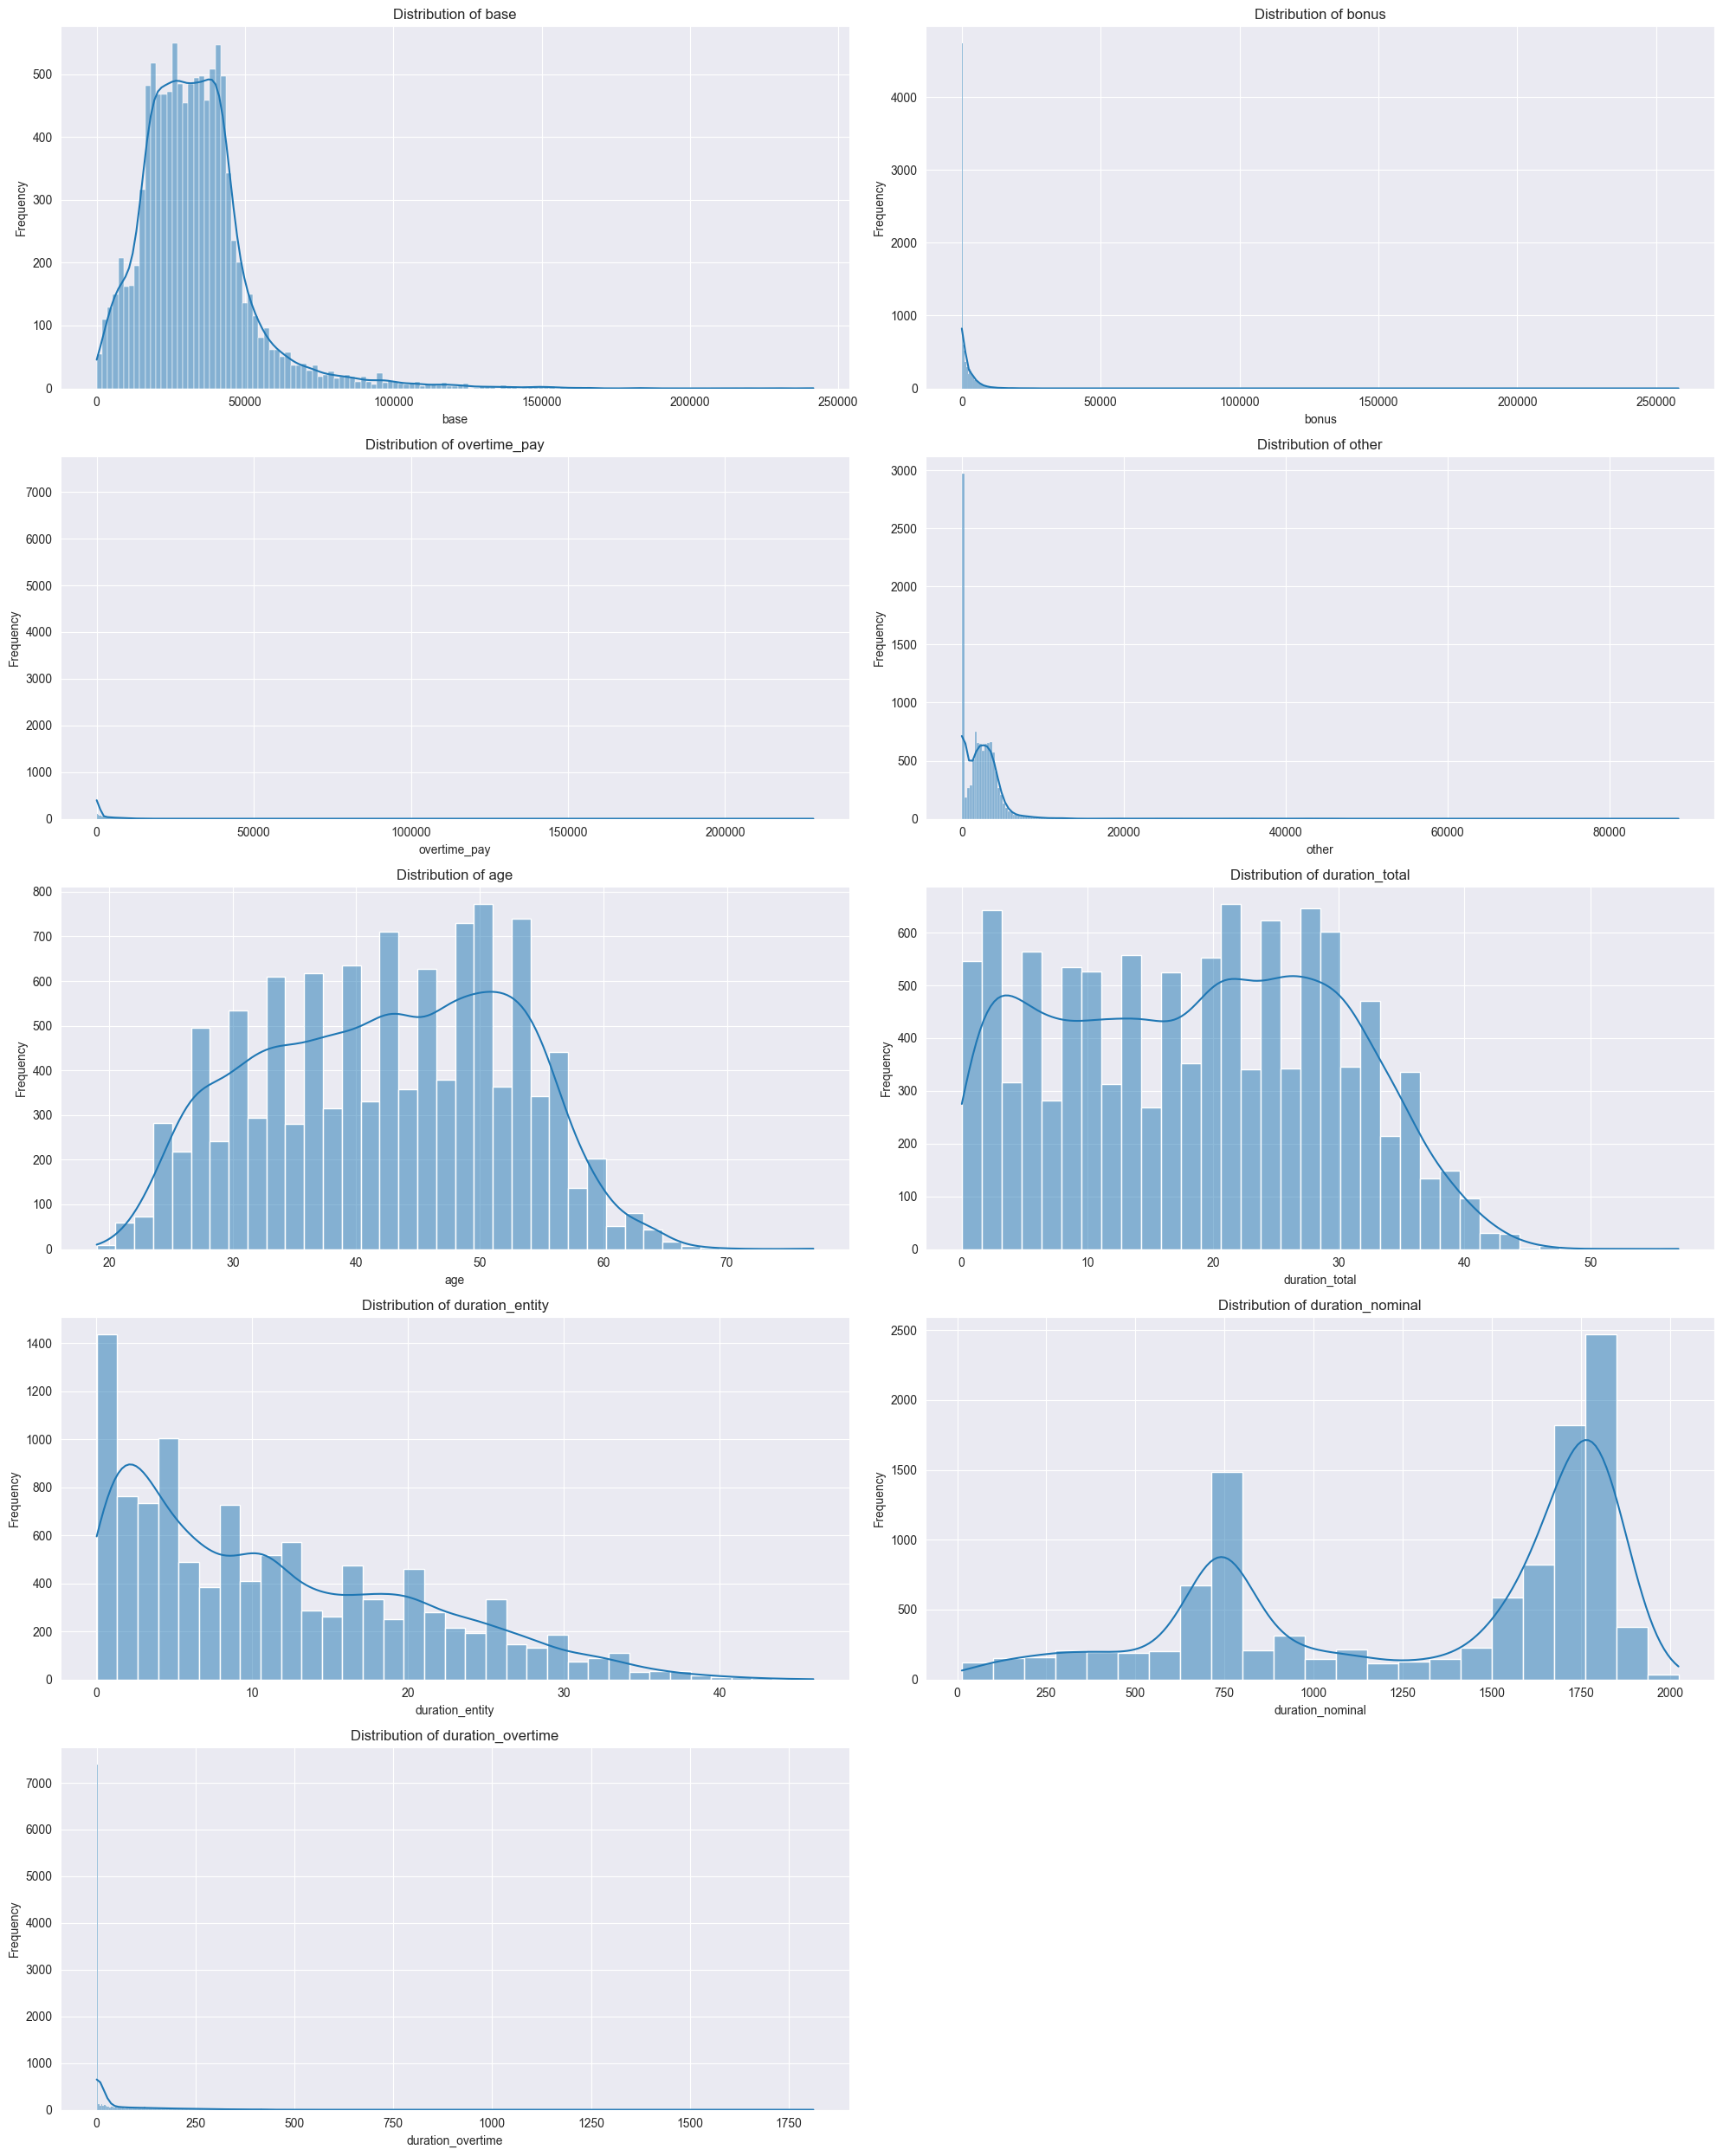

In [8]:
plt.figure(figsize=(20, 25))
for i, var in enumerate(quantitative_vars):
    plt.subplot(5, 2, i+1)
    sns.histplot(df[var], kde=True)
    plt.title(f'Distribution of {var}')
    plt.xlabel(var)
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


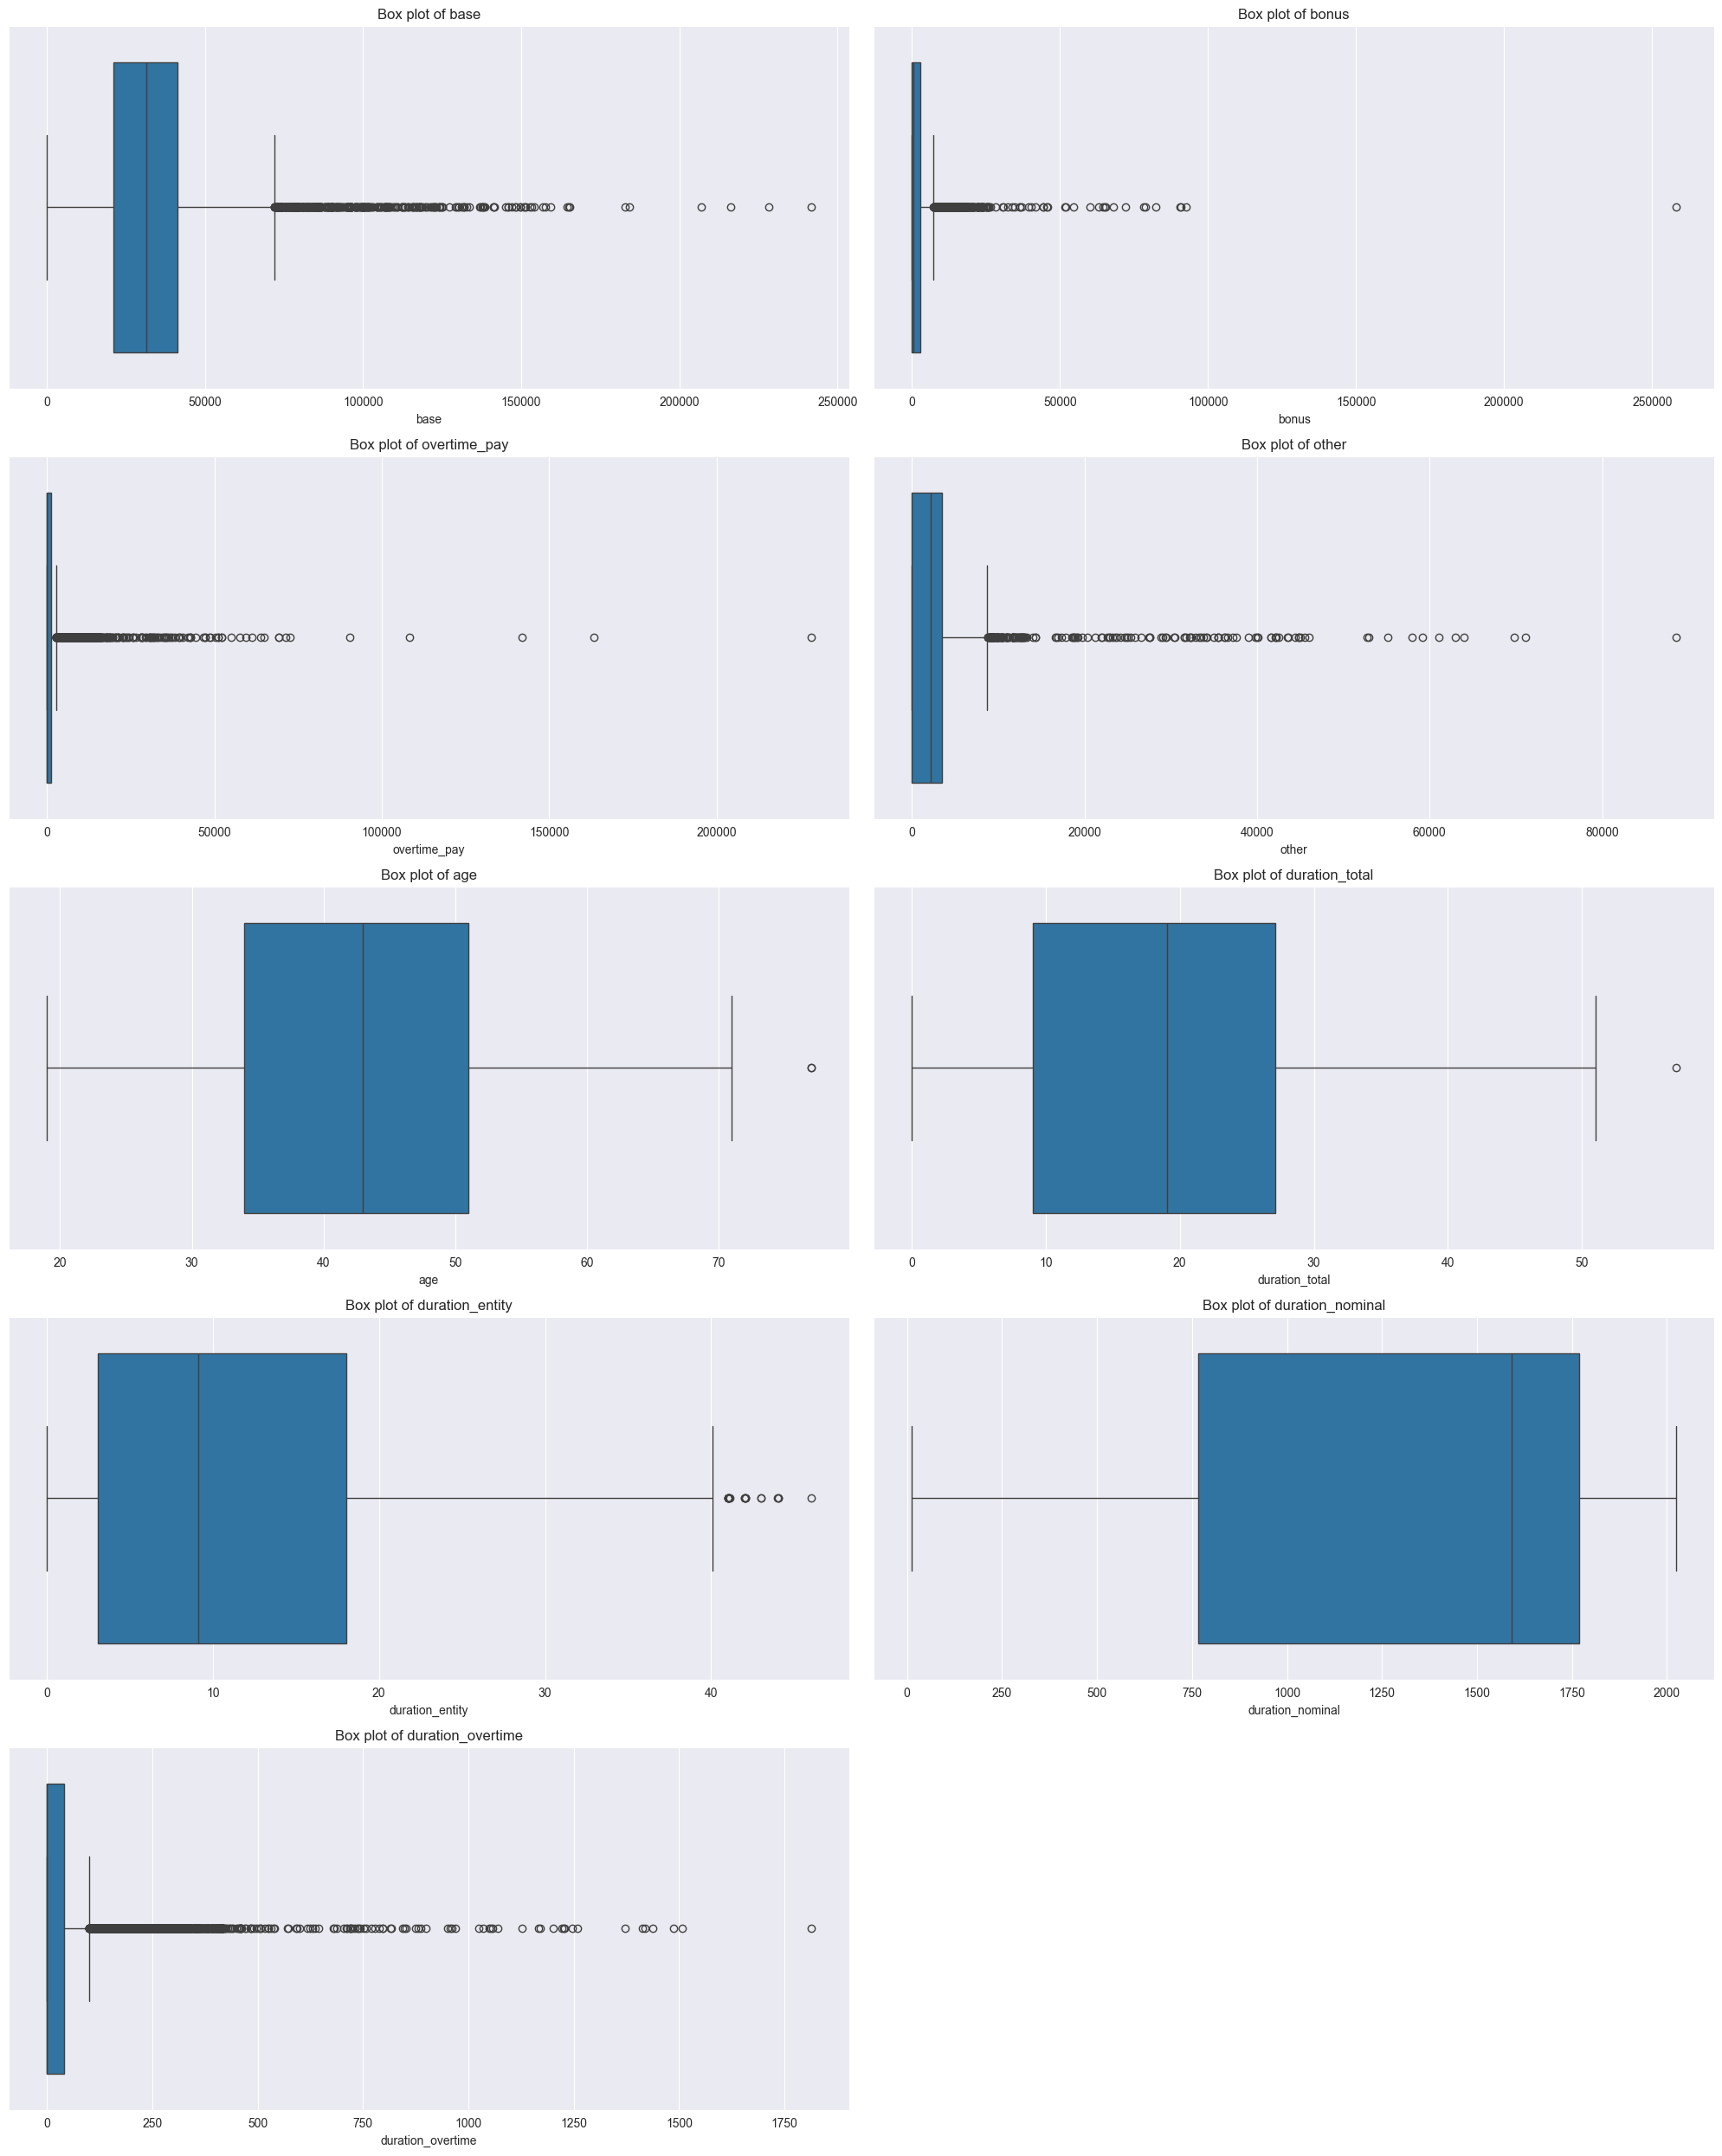

In [9]:
plt.figure(figsize=(20, 25))
for i, var in enumerate(quantitative_vars):
    plt.subplot(5, 2, i+1)
    sns.boxplot(x=df[var])
    plt.title(f'Box plot of {var}')
    plt.xlabel(var)

plt.tight_layout()
plt.show()


base: Best fitting distribution is lognorm (AIC=244985.83)


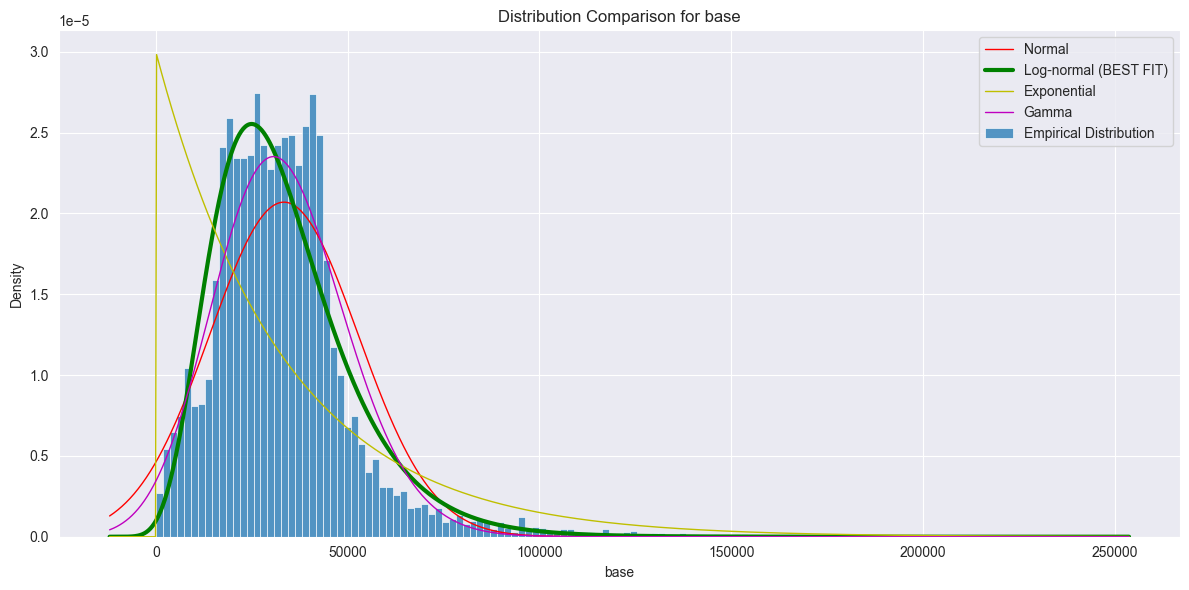

bonus: Best fitting distribution is expon (AIC=190593.66)


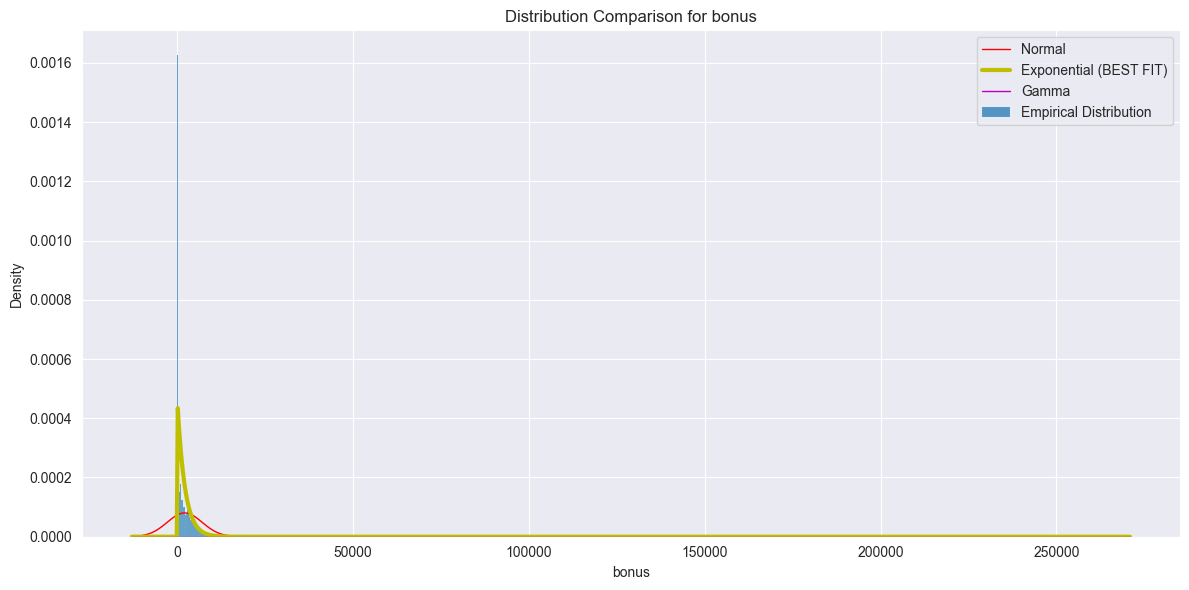

overtime_pay: Best fitting distribution is expon (AIC=185378.57)


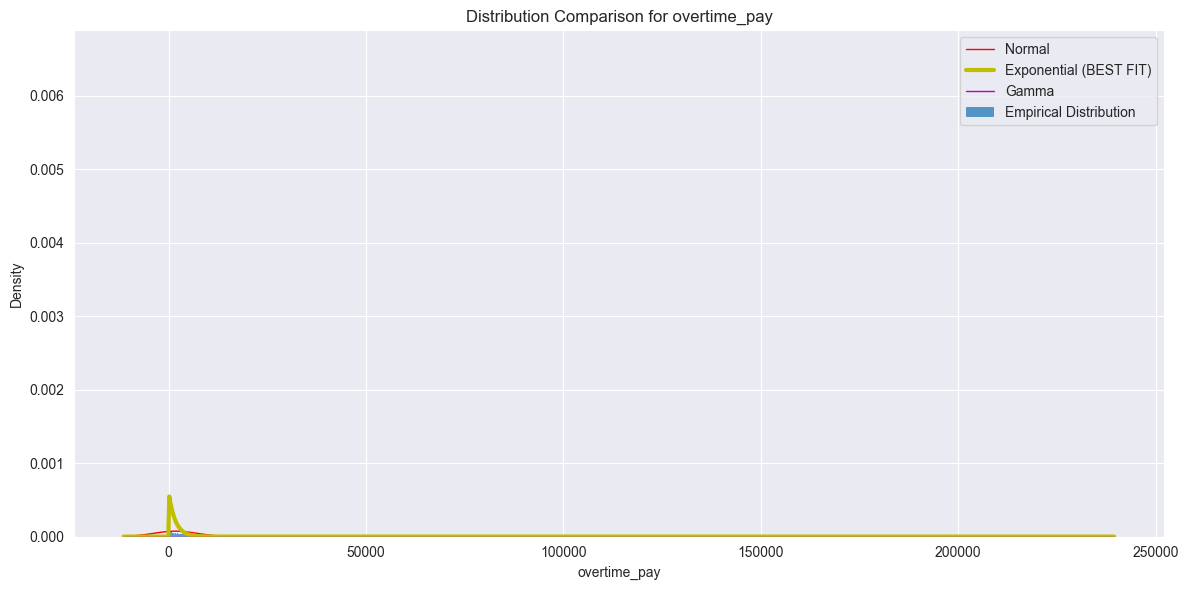

other: Best fitting distribution is expon (AIC=193935.23)


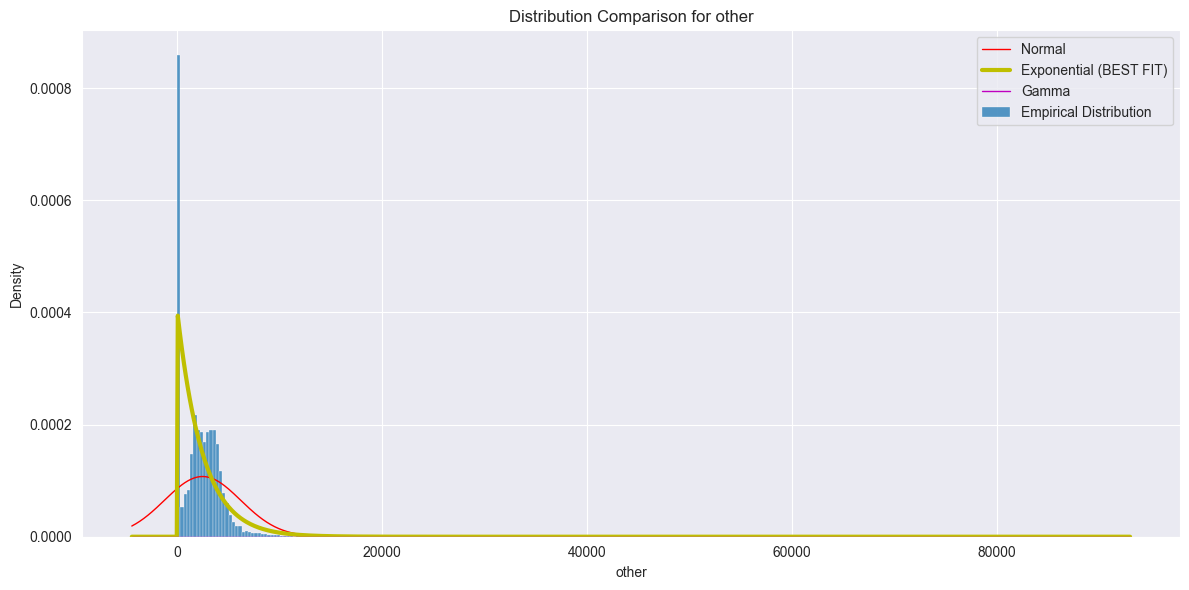

age: Best fitting distribution is norm (AIC=81903.21)


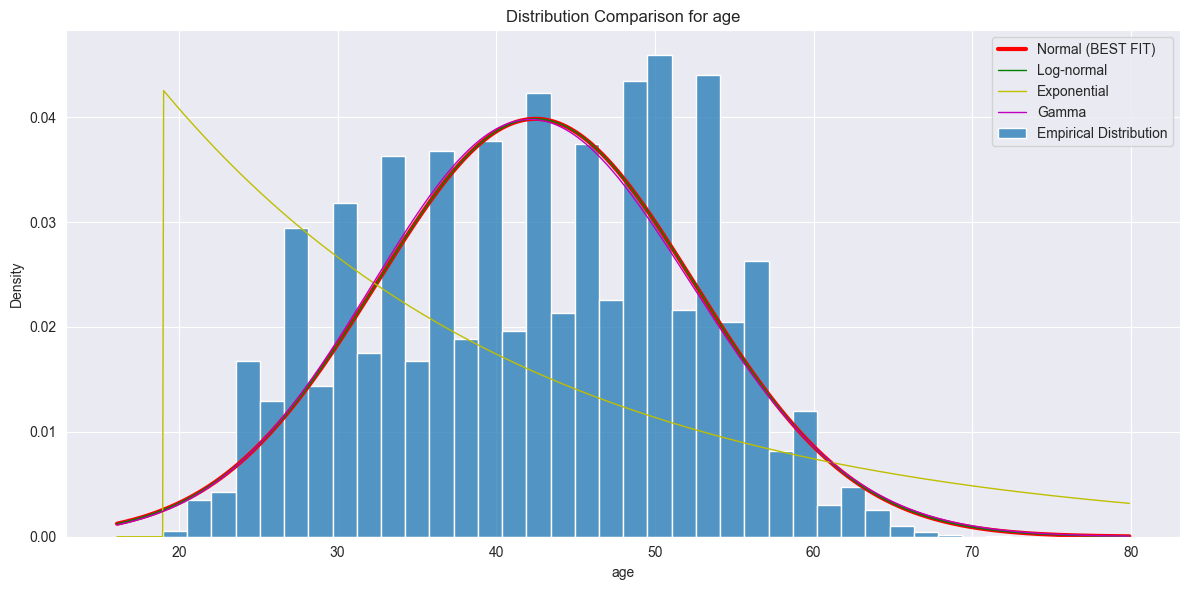

duration_total: Best fitting distribution is lognorm (AIC=83959.79)


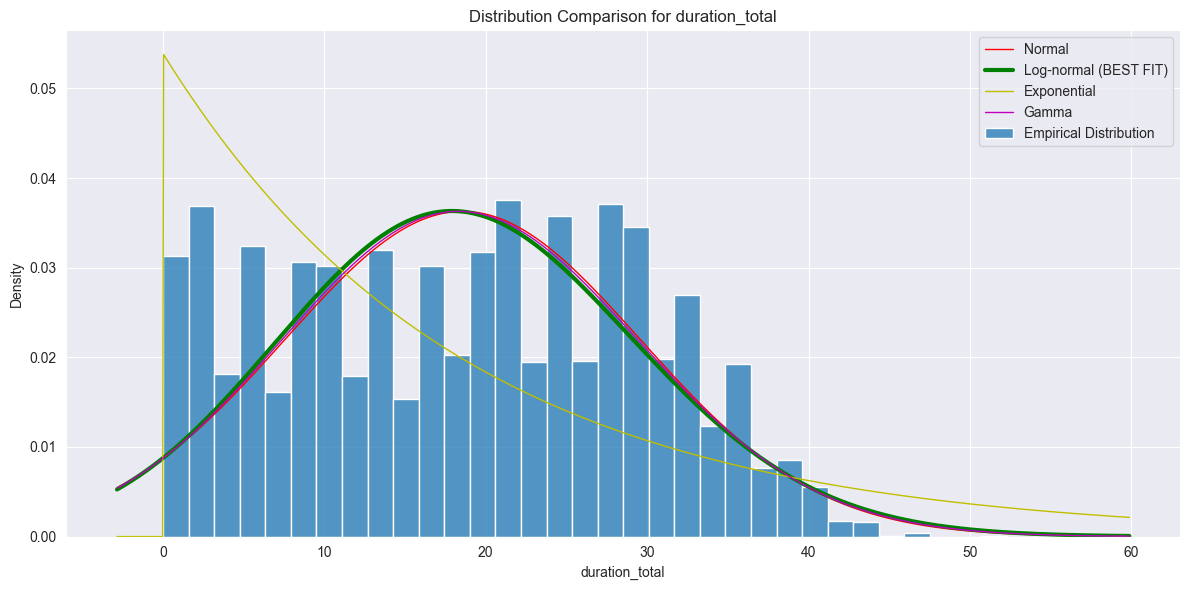

duration_entity: Best fitting distribution is gamma (AIC=74237.16)


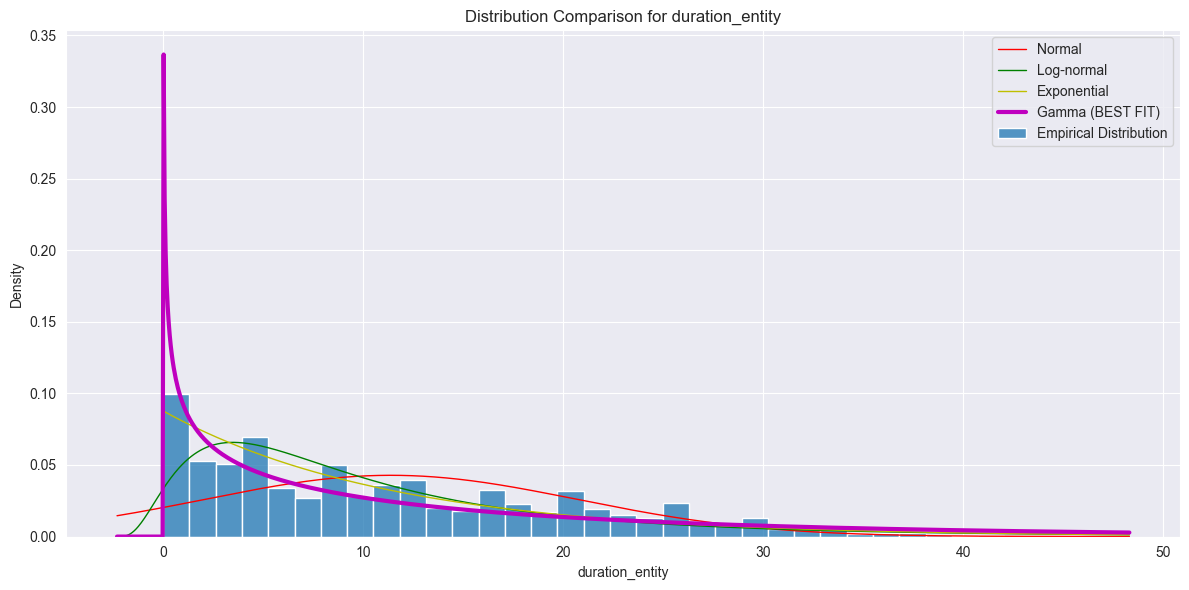

duration_nominal: Best fitting distribution is norm (AIC=169641.88)


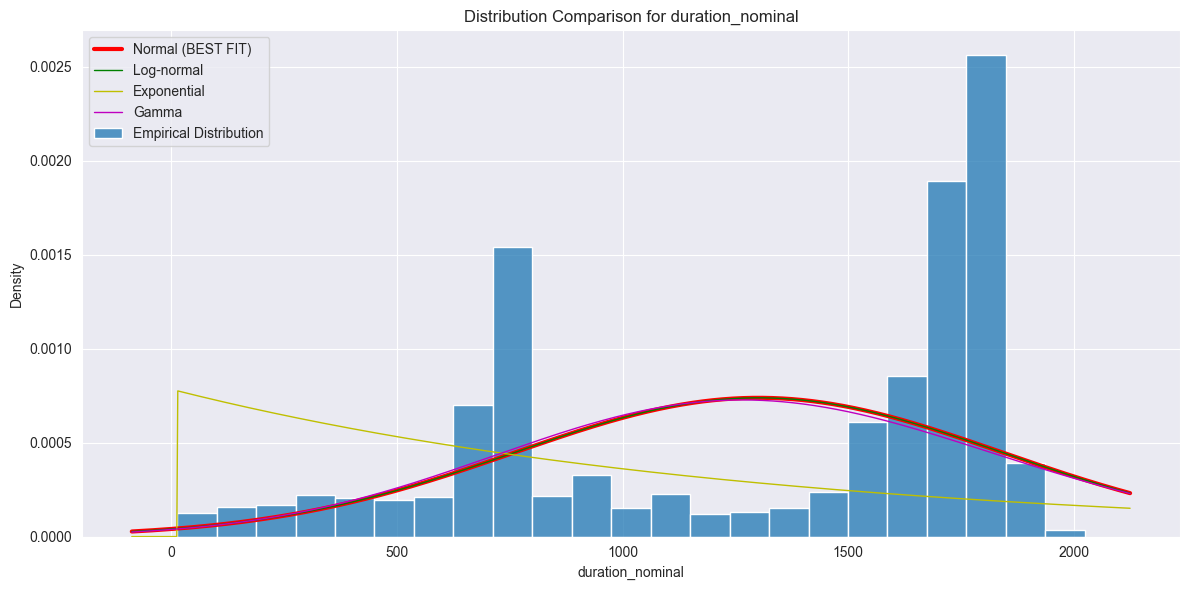

duration_overtime: Best fitting distribution is gamma (AIC=-414754.57)


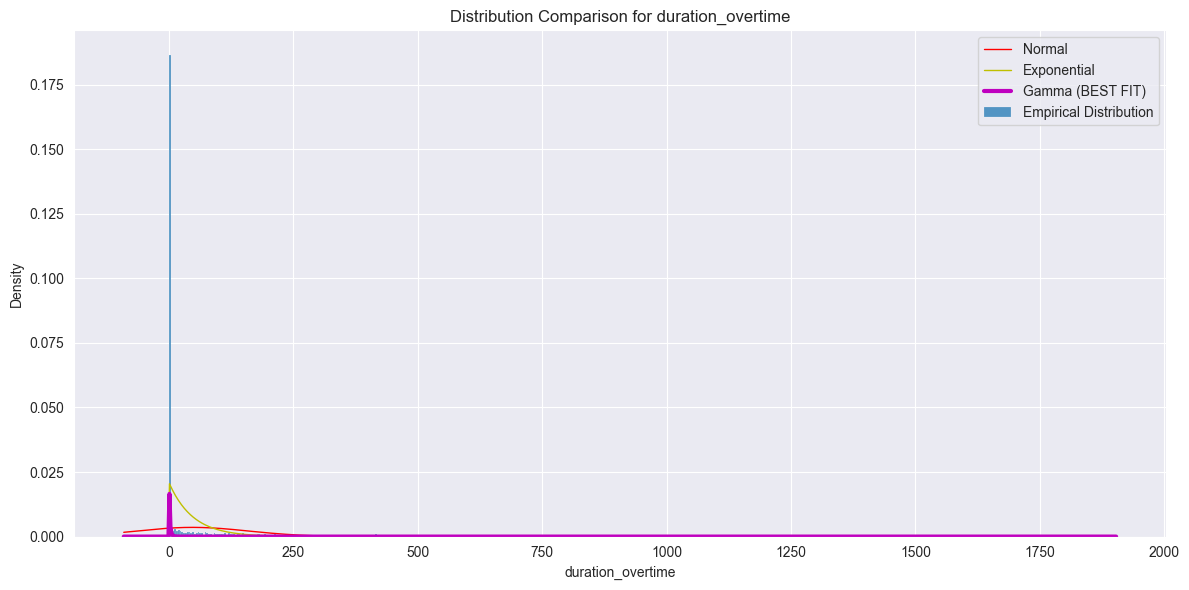

In [10]:
from scipy import stats

def find_best_distribution(data, var_name):
    # List of distributions to test
    distributions = ['norm', 'lognorm', 'expon', 'gamma']
    best_distribution = None
    best_params = None
    best_aic = np.inf

    # For AIC calculation
    n = len(data)

    for distribution in distributions:
        # Skip distributions that don't apply to the data
        if distribution == 'lognorm' and data.min() <= 0:
            continue

        try:
            # Fit distribution
            if distribution == 'norm':
                params = stats.norm.fit(data)
                aic = 2 * 2 - 2 * np.sum(stats.norm.logpdf(data, *params))  # 2 parameters
            elif distribution == 'lognorm':
                params = stats.lognorm.fit(data)
                aic = 2 * 3 - 2 * np.sum(stats.lognorm.logpdf(data, *params))  # 3 parameters
            elif distribution == 'expon':
                params = stats.expon.fit(data)
                aic = 2 * 2 - 2 * np.sum(stats.expon.logpdf(data, *params))  # 2 parameters
            elif distribution == 'gamma':
                params = stats.gamma.fit(data)
                aic = 2 * 3 - 2 * np.sum(stats.gamma.logpdf(data, *params))  # 3 parameters

            # Update best distribution if this one's better
            if aic < best_aic:
                best_distribution = distribution
                best_params = params
                best_aic = aic

        except Exception as e:
            continue

    # Print the best distribution
    print(f"{var_name}: Best fitting distribution is {best_distribution} (AIC={best_aic:.2f})")
    return best_distribution, best_params

def plot_distribution_comparison(data, var_name, best_dist):
    plt.figure(figsize=(12, 6))

    ax = sns.histplot(data, kde=False, stat="density", label="Empirical Distribution")

    x_min, x_max = plt.xlim()
    x = np.linspace(x_min, x_max, 1000)

    dist_styles = {
        'norm': ('r-', 'Normal'),
        'lognorm': ('g-', 'Log-normal'),
        'expon': ('y-', 'Exponential'),
        'gamma': ('m-', 'Gamma')
    }

    # Plot normal distribution
    if data.min() <= 0 and best_dist == 'lognorm':
        best_dist = 'norm'

    if True:
        mu, sigma = stats.norm.fit(data)
        pdf_norm = stats.norm.pdf(x, mu, sigma)
        if best_dist == 'norm':
            plt.plot(x, pdf_norm, dist_styles['norm'][0], linewidth=3, label=f'{dist_styles["norm"][1]} (BEST FIT)')
        else:
            plt.plot(x, pdf_norm, dist_styles['norm'][0], linewidth=1, label=f'{dist_styles["norm"][1]}')

    if data.min() > 0:
        shape, loc, scale = stats.lognorm.fit(data)
        pdf_lognorm = stats.lognorm.pdf(x, shape, loc=loc, scale=scale)
        if best_dist == 'lognorm':
            plt.plot(x, pdf_lognorm, dist_styles['lognorm'][0], linewidth=3, label=f'{dist_styles["lognorm"][1]} (BEST FIT)')
        else:
            plt.plot(x, pdf_lognorm, dist_styles['lognorm'][0], linewidth=1, label=f'{dist_styles["lognorm"][1]}')

    if data.min() >= 0:
        loc, scale = stats.expon.fit(data)
        pdf_expon = stats.expon.pdf(x, loc=loc, scale=scale)
        if best_dist == 'expon':
            plt.plot(x, pdf_expon, dist_styles['expon'][0], linewidth=3, label=f'{dist_styles["expon"][1]} (BEST FIT)')
        else:
            plt.plot(x, pdf_expon, dist_styles['expon'][0], linewidth=1, label=f'{dist_styles["expon"][1]}')

        try:
            a, loc, scale = stats.gamma.fit(data)
            pdf_gamma = stats.gamma.pdf(x, a, loc=loc, scale=scale)
            if best_dist == 'gamma':
                plt.plot(x, pdf_gamma, dist_styles['gamma'][0], linewidth=3, label=f'{dist_styles["gamma"][1]} (BEST FIT)')
            else:
                plt.plot(x, pdf_gamma, dist_styles['gamma'][0], linewidth=1, label=f'{dist_styles["gamma"][1]}')
        except:
            pass

    plt.title(f'Distribution Comparison for {var_name}')
    plt.xlabel(var_name)
    plt.ylabel('Density')
    plt.legend()
    plt.tight_layout()
    plt.show()

for var in quantitative_vars:
    best_dist, best_params = find_best_distribution(df[var], var)
    plot_distribution_comparison(df[var], var, best_dist)


For qualitative variables, it can be observed that most employees are woman, have higher education, work in the public sector and have an employment contract for an indefinite period.
For quantitative variables it can be observed that the base pay follows a logarithmic normal distribution, which is expected for a value describing a salary. Age follows a normal distribution, which can be expected if workers gradually enter and exit the workforce as they age. Distribution of workers in the middle of the working age bracket remains fairly constant.
For some quantitative variables, mainly bonus and overtime pay, the number of workers not receiving anything is so high that fitting a standard density function is challenging. This is expected for the public sector, where overtime pay and bonuses are generally rare.

# Task 2: Clustering


For n_clusters = 2, the silhouette score is 0.206
For n_clusters = 3, the silhouette score is 0.222
For n_clusters = 4, the silhouette score is 0.190
For n_clusters = 5, the silhouette score is 0.213
For n_clusters = 6, the silhouette score is 0.207
For n_clusters = 7, the silhouette score is 0.214
For n_clusters = 8, the silhouette score is 0.200
For n_clusters = 9, the silhouette score is 0.205
For n_clusters = 10, the silhouette score is 0.194


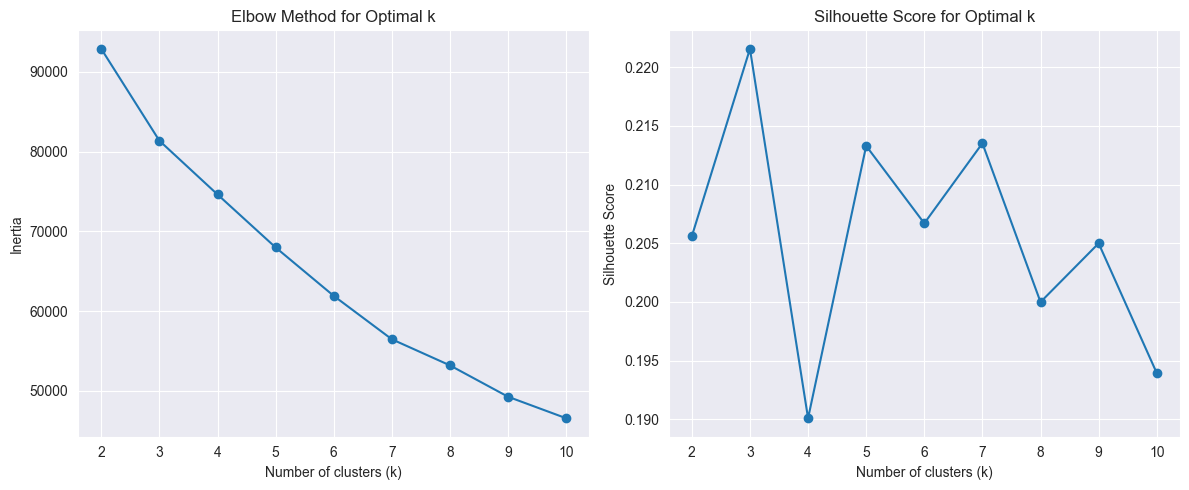

For n_clusters = 2 The average silhouette_score is : 0.2055963185618247


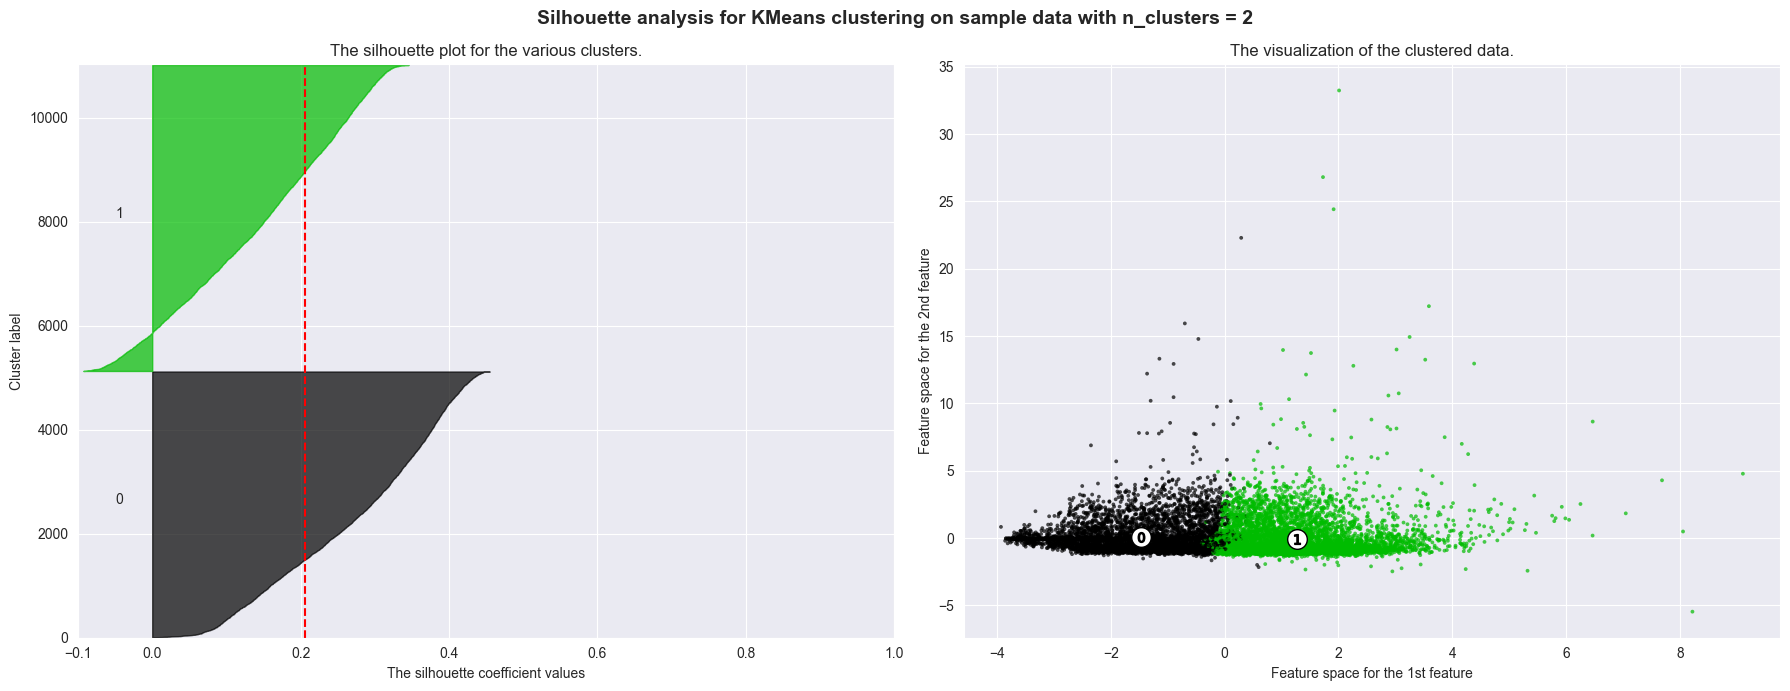

For n_clusters = 3 The average silhouette_score is : 0.22156143909985637


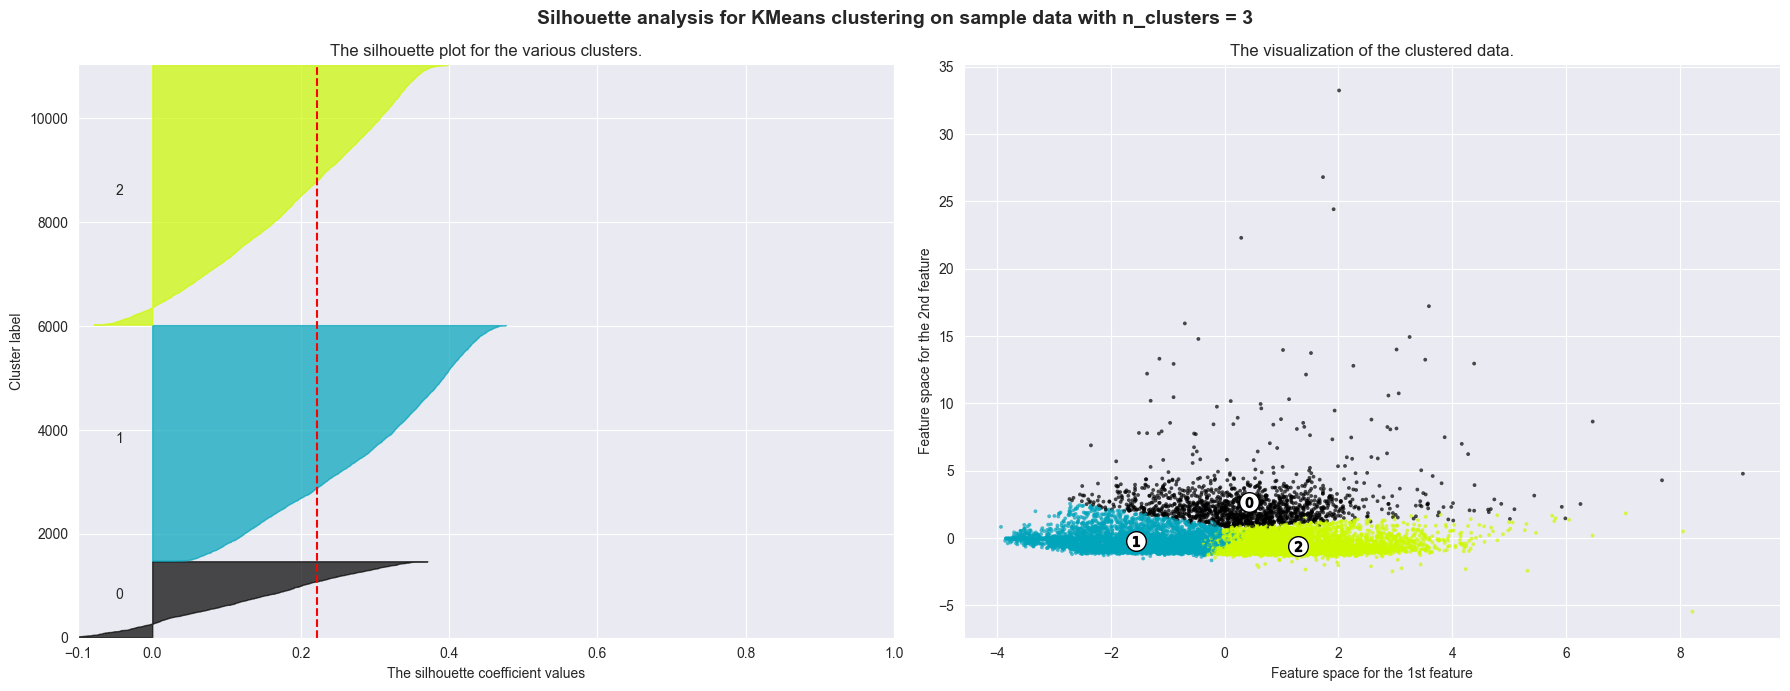

For n_clusters = 4 The average silhouette_score is : 0.19008644733371566


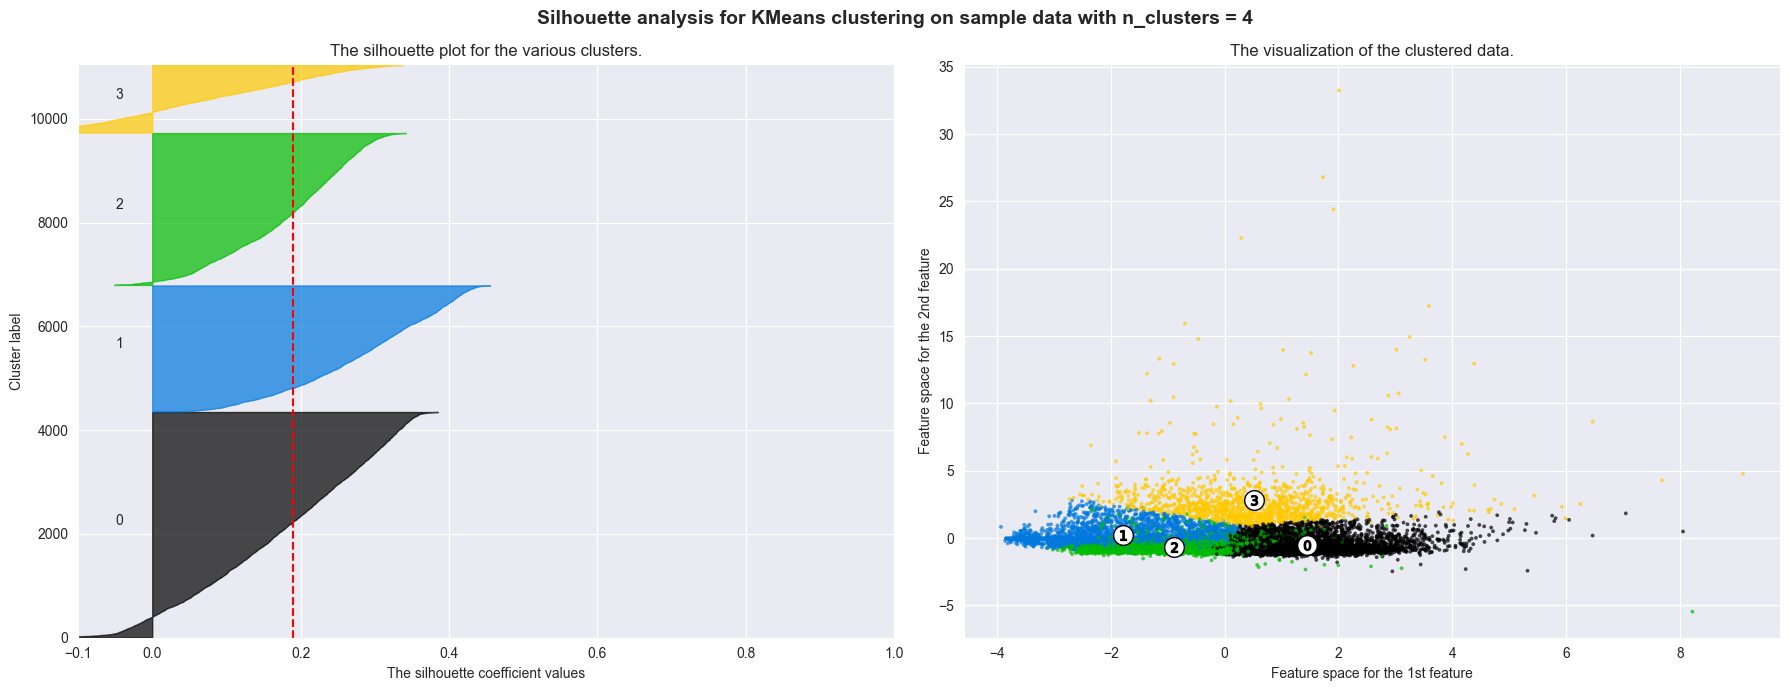

For n_clusters = 5 The average silhouette_score is : 0.2132951859443999


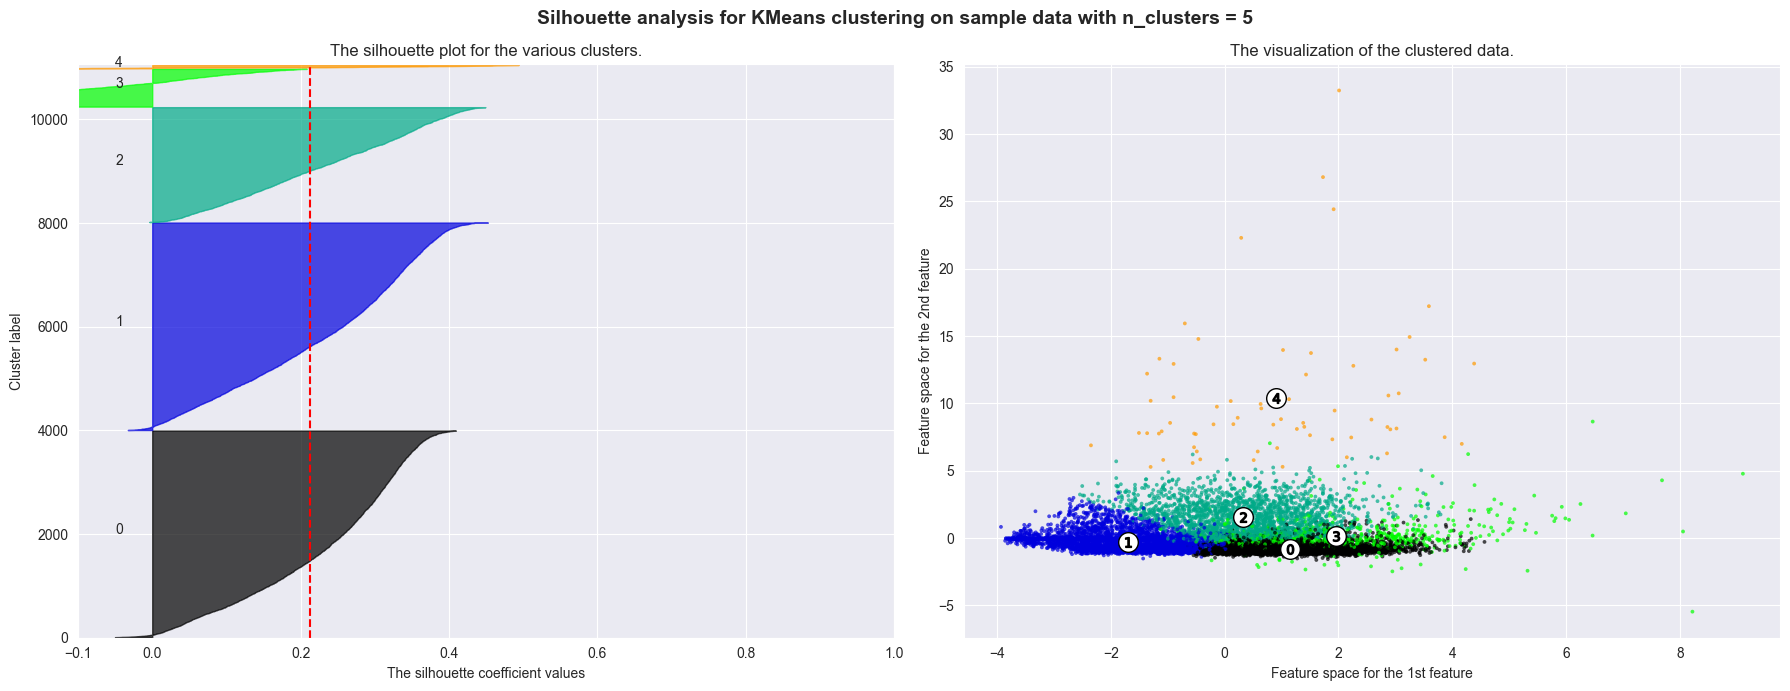

For n_clusters = 6 The average silhouette_score is : 0.2066966915566421


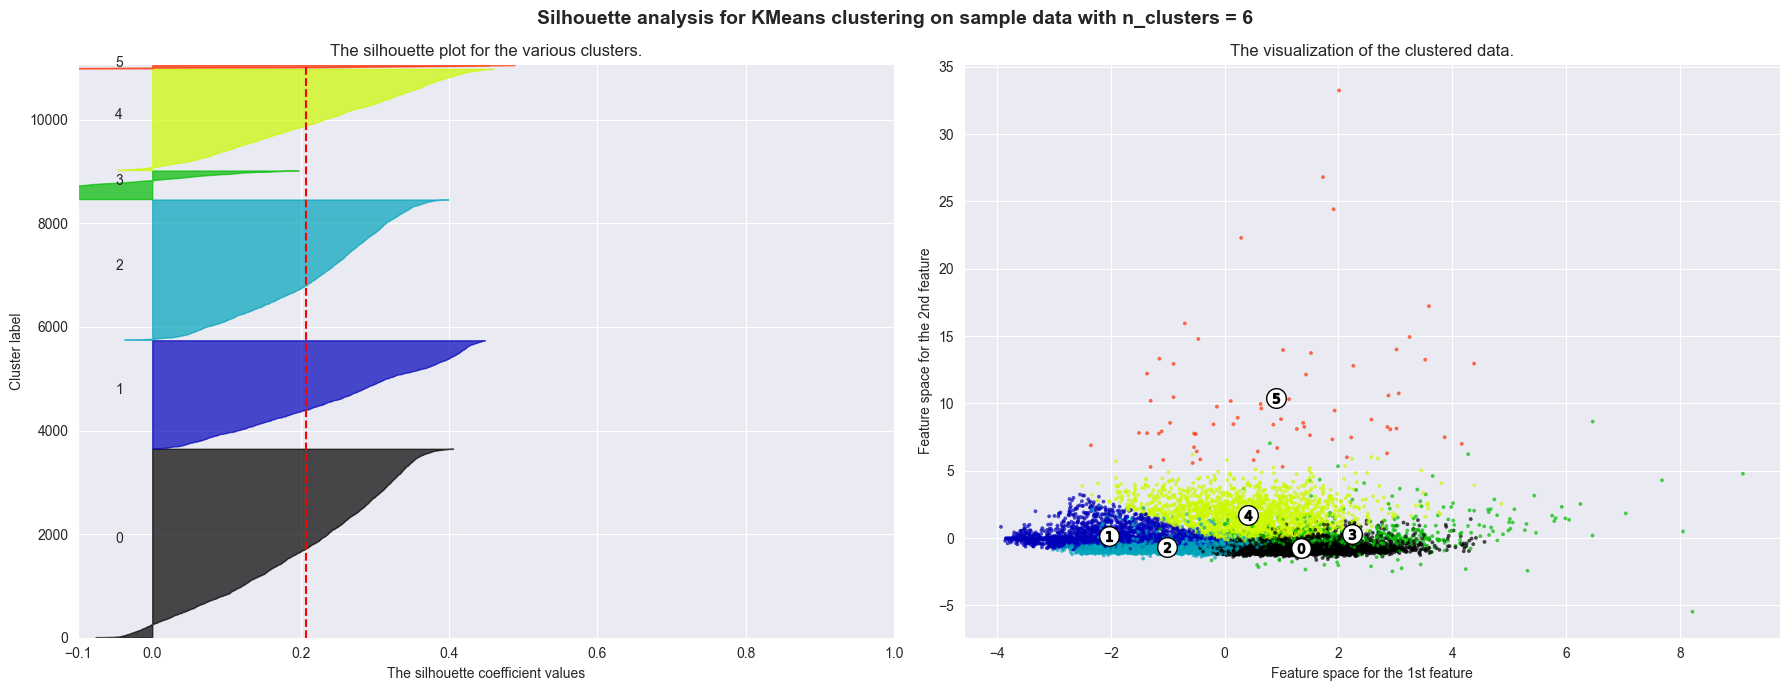

For n_clusters = 7 The average silhouette_score is : 0.2135190651839411


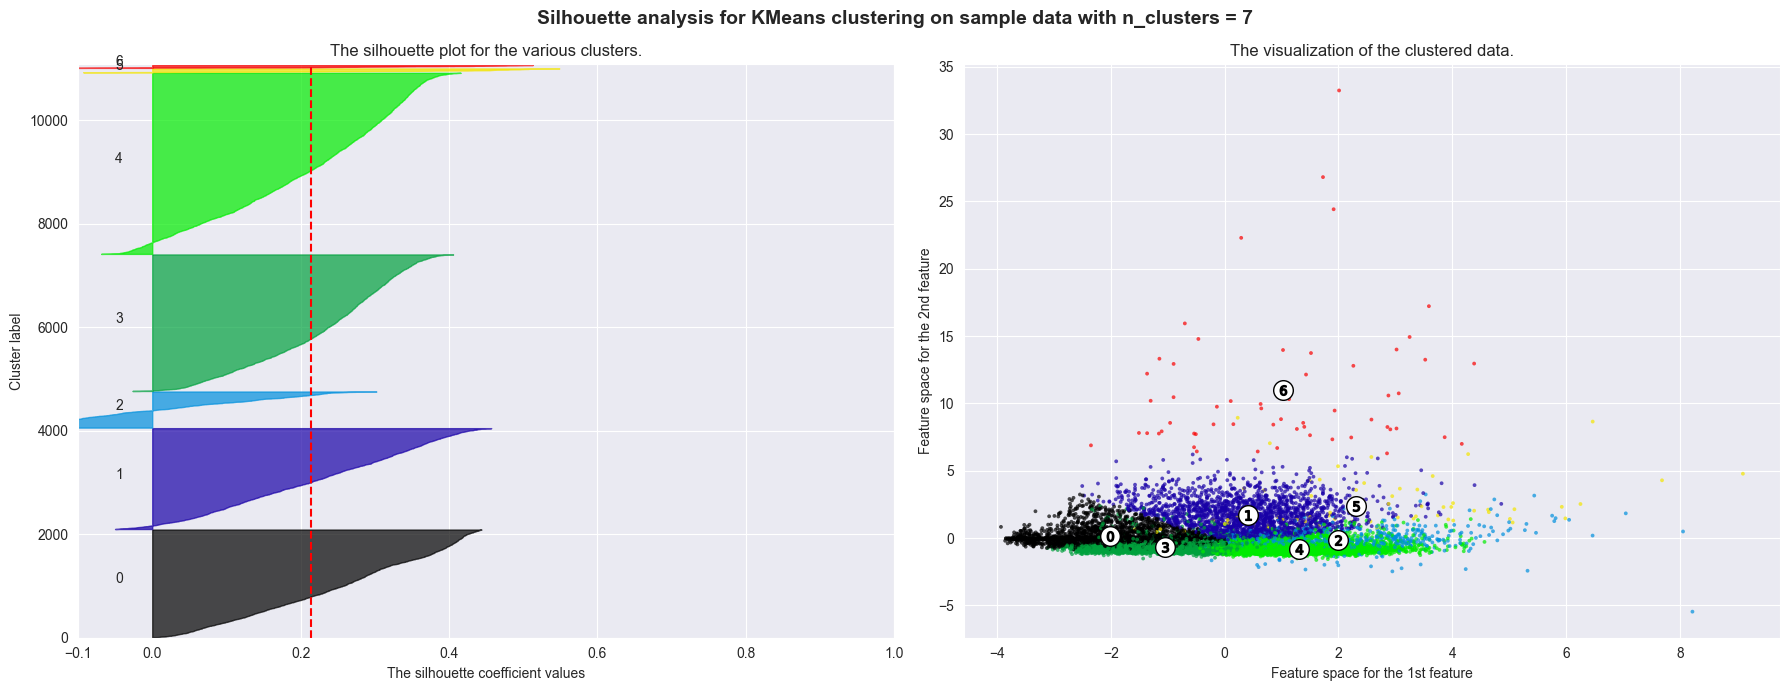

For n_clusters = 8 The average silhouette_score is : 0.1999872807838748


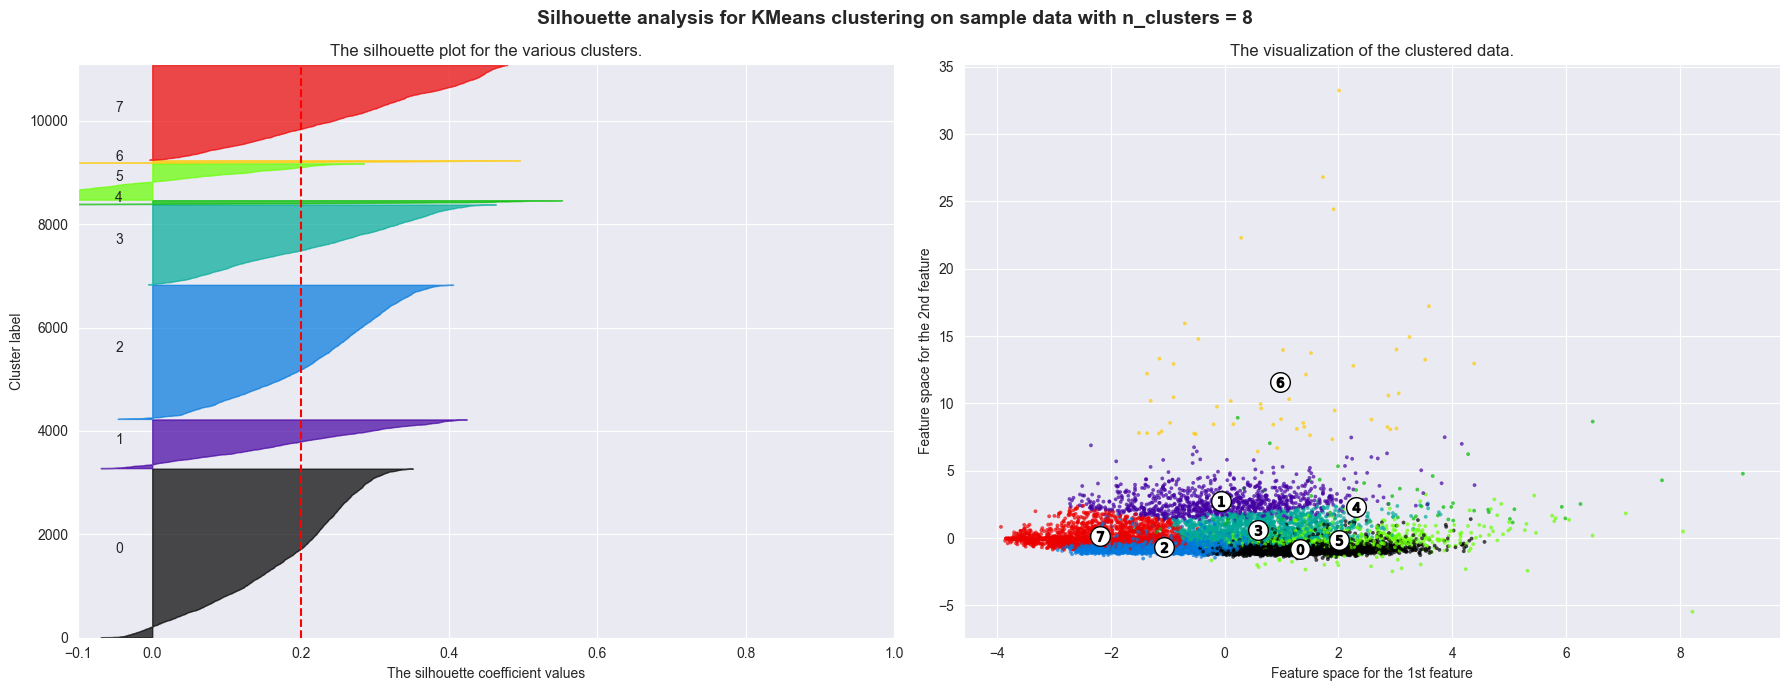

For n_clusters = 9 The average silhouette_score is : 0.20499261147343328


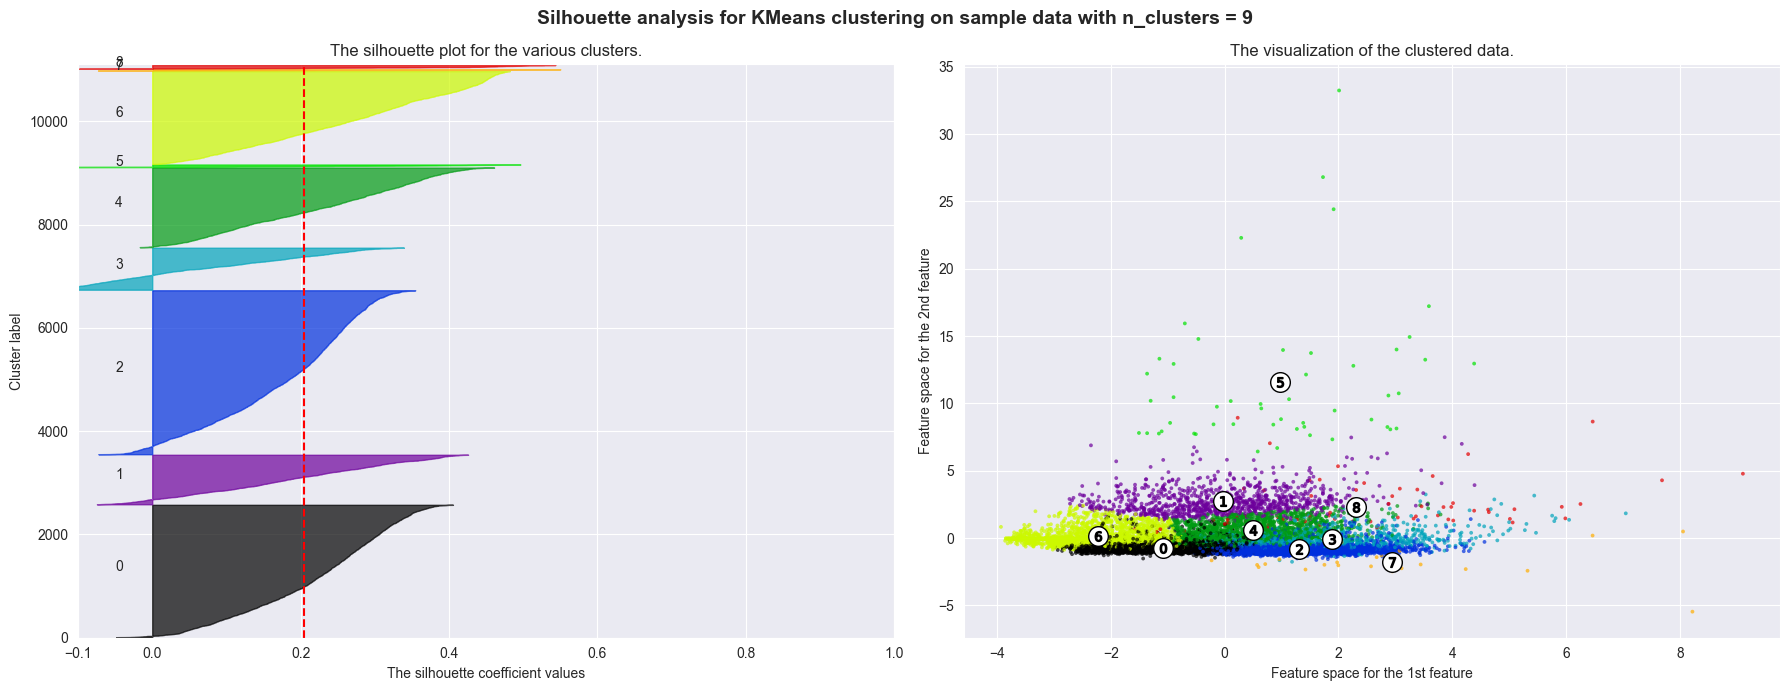

For n_clusters = 10 The average silhouette_score is : 0.19393733901081842


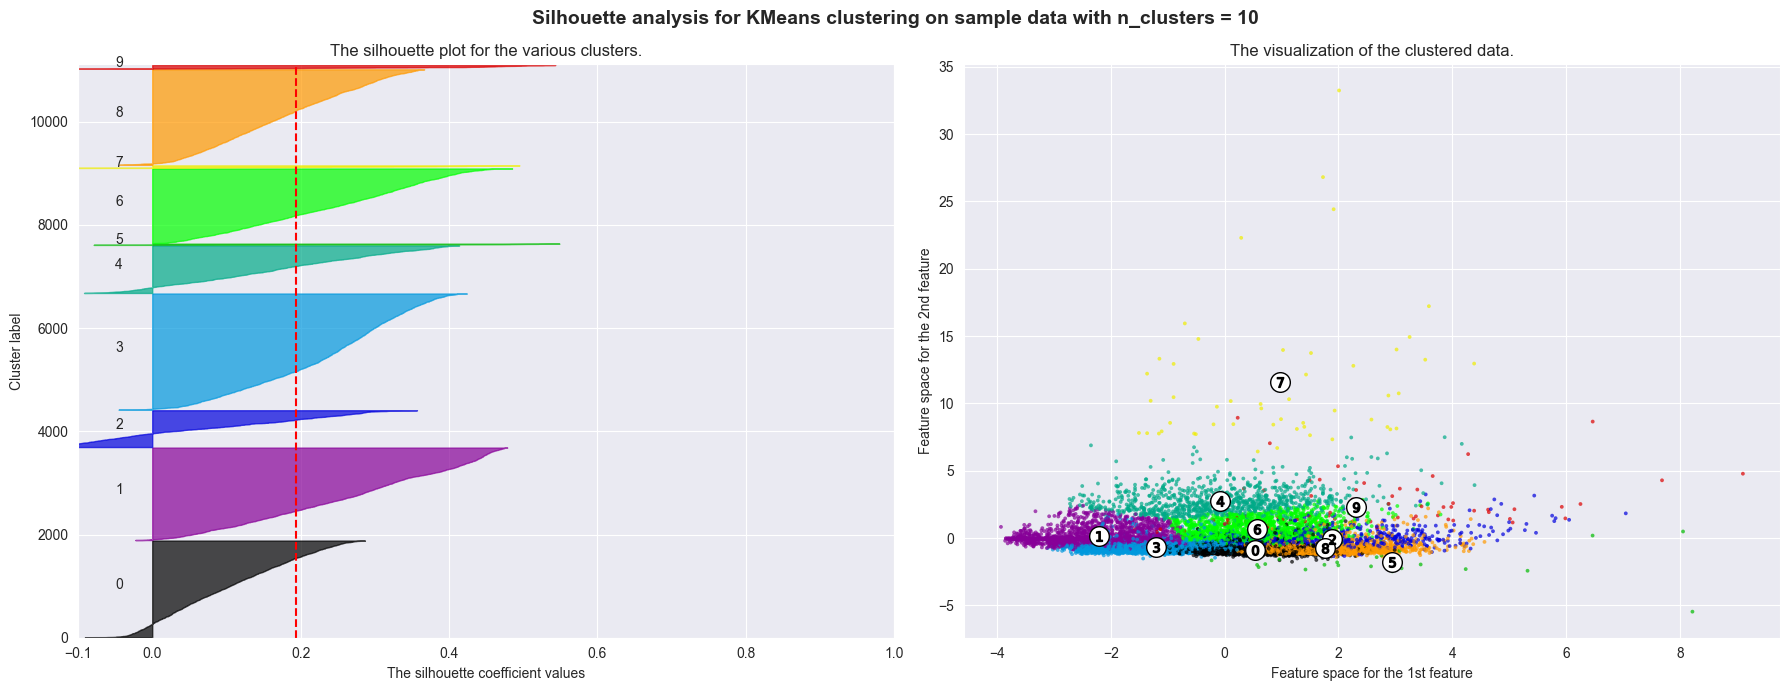

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.decomposition import PCA
import matplotlib.cm as cm

quantitative_features = ['base', 'bonus', 'overtime_pay', 'other', 'age',
                      'duration_total', 'duration_entity', 'duration_nominal', 'duration_overtime']
qualitative_features = ['sector', 'section_07', 'sex', 'education', 'contract']

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), quantitative_features),
        ('cat', OneHotEncoder(drop='first'), qualitative_features)
    ])

X_processed = preprocessor.fit_transform(df[quantitative_features + qualitative_features])

def find_optimal_clusters(data, max_k):
    inertias = []
    silhouette_scores = []
    k_values = range(2, max_k+1)

    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)

        labels = kmeans.labels_
        silhouette_avg = silhouette_score(data, labels)
        silhouette_scores.append(silhouette_avg)
        print(f"For n_clusters = {k}, the silhouette score is {silhouette_avg:.3f}")

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(k_values, inertias, 'o-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Inertia')
    plt.title('Elbow Method for Optimal k')
    plt.grid(True)

    plt.subplot(1, 2, 2)
    plt.plot(k_values, silhouette_scores, 'o-')
    plt.xlabel('Number of clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score for Optimal k')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

    plot_silhouette_analysis(data, k_values)

    return inertias, silhouette_scores

def plot_silhouette_analysis(X, range_n_clusters):
    for n_clusters in range_n_clusters:
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        ax1.set_xlim([-0.1, 1])
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

        clusterer = KMeans(n_clusters=n_clusters, random_state=42, n_init=10)
        cluster_labels = clusterer.fit_predict(X)

        silhouette_avg = silhouette_score(X, cluster_labels)
        print(
            "For n_clusters =",
            n_clusters,
            "The average silhouette_score is :",
            silhouette_avg,
        )

        sample_silhouette_values = silhouette_samples(X, cluster_labels)

        y_lower = 10
        for i in range(n_clusters):
            ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

            ith_cluster_silhouette_values.sort()

            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i

            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(
                np.arange(y_lower, y_upper),
                0,
                ith_cluster_silhouette_values,
                facecolor=color,
                edgecolor=color,
                alpha=0.7,
            )

            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

            y_lower = y_upper + 10

        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")

        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

        if X.shape[1] > 2:
            pca = PCA(n_components=2)
            X_pca = pca.fit_transform(X)
            X_plot = X_pca
        else:
            X_plot = X

        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(
            X_plot[:, 0], X_plot[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
        )

        centers = clusterer.cluster_centers_

        if X.shape[1] > 2:
            centers_pca = pca.transform(centers)
            centers_plot = centers_pca
        else:
            centers_plot = centers

        ax2.scatter(
            centers_plot[:, 0],
            centers_plot[:, 1],
            marker="o",
            c="white",
            alpha=1,
            s=200,
            edgecolor="k",
        )

        for i, c in enumerate(centers_plot):
            ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")

        plt.suptitle(
            "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
            % n_clusters,
            fontsize=14,
            fontweight="bold",
        )

        plt.tight_layout()
        plt.show()

# Find the optimal number of clusters
inertias, silhouette_scores = find_optimal_clusters(X_processed, 10)


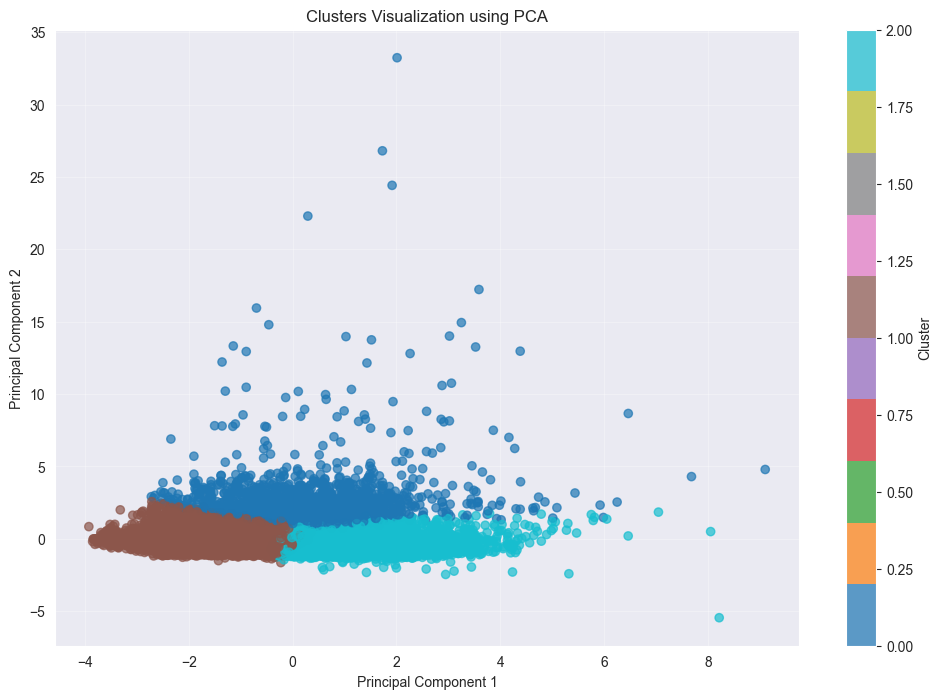

In [12]:
optimal_k = 3

kmeans = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans.fit_predict(X_processed)

df['cluster'] = cluster_labels

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_processed)

plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=cluster_labels, cmap=cm.tab10, alpha=0.7)
plt.colorbar(scatter, label='Cluster')
plt.title('Clusters Visualization using PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid(True, alpha=0.3)
plt.show()


The PCA plot above shows the clusters in a 2-dimensional space. Principal Component Analysis (PCA) is used to reduce the dimensionality of our data while preserving as much variance as possible. This allows us to visualize the high-dimensional data in a 2D plot.



Cluster Means for Numerical Features:
                 base        bonus  overtime_pay        other        age  \
cluster                                                                    
0        42315.781921  1115.529563   9618.295051  5496.176179  44.021189   
1        25565.313919  1557.876191    608.508858  1705.047060  33.941591   
2        37849.260102  2942.648782    327.928560  2295.435942  49.755200   

         duration_total  duration_entity  duration_nominal  duration_overtime  
cluster                                                                        
0             20.235386        14.729453        908.789938         254.484901  
1              8.579520         4.616196       1152.244305          21.514620  
2             27.141646        16.584466       1551.417940          10.960466  


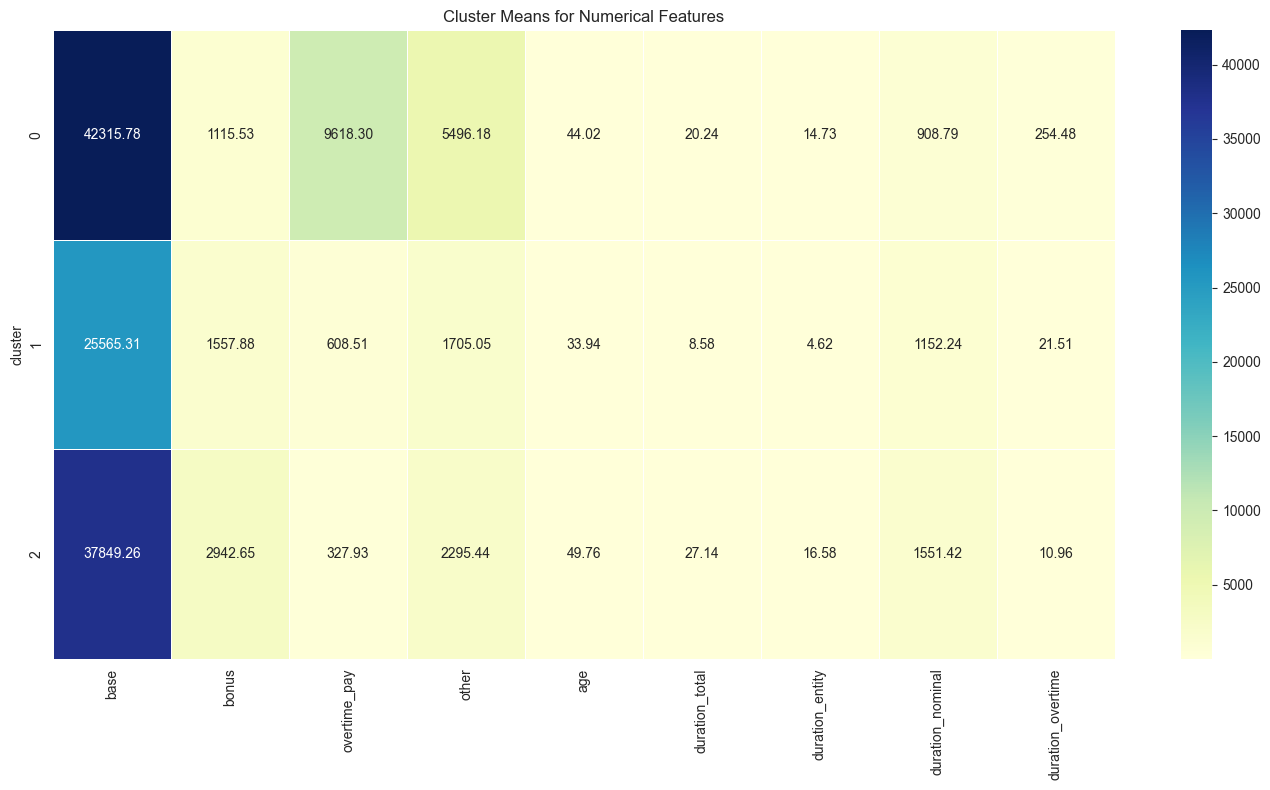

In [13]:
cluster_means = df.groupby('cluster')[quantitative_features].mean()
print("\nCluster Means for Numerical Features:")
print(cluster_means)

plt.figure(figsize=(14, 8))
sns.heatmap(cluster_means, annot=True, cmap="YlGnBu", fmt=".2f", linewidths=.5)
plt.title('Cluster Means for Numerical Features')
plt.tight_layout()
plt.show()


C:\Users\frani\AppData\Local\Temp\ipykernel_54132\1328515407.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['sector_label'] = cluster_data['sector'].map({1: 'public', 2: 'private'})
C:\Users\frani\AppData\Local\Temp\ipykernel_54132\1328515407.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['sector_label'] = cluster_data['sector'].map({1: 'public', 2: 'private'})
C:\Users\frani\AppData\Local\Temp\ipykernel_54132\1328515407.py:13: SettingWithCopyWarning: 
A value is trying

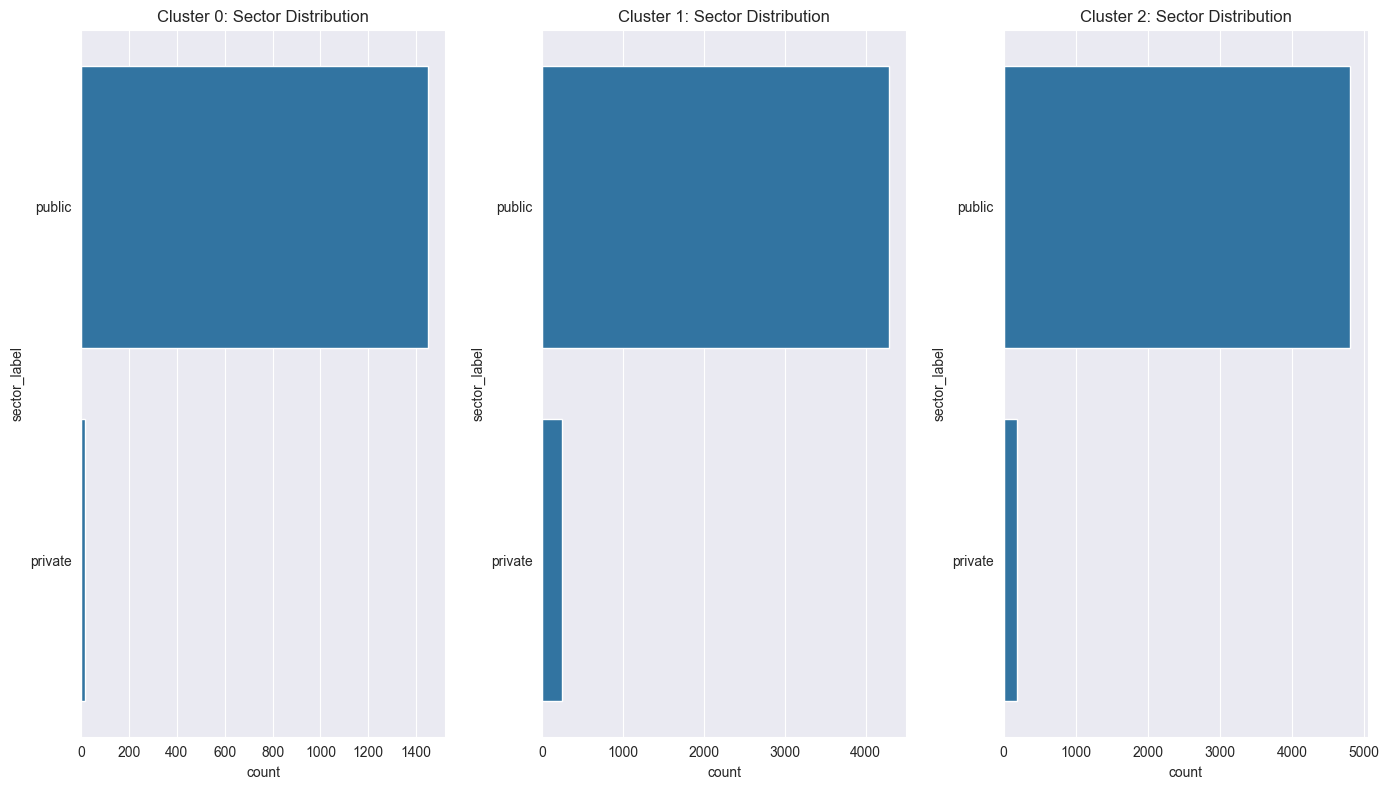

C:\Users\frani\AppData\Local\Temp\ipykernel_54132\1328515407.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['section_07_label'] = cluster_data['section_07'].map({
C:\Users\frani\AppData\Local\Temp\ipykernel_54132\1328515407.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['section_07_label'] = cluster_data['section_07'].map({
C:\Users\frani\AppData\Local\Temp\ipykernel_54132\1328515407.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a

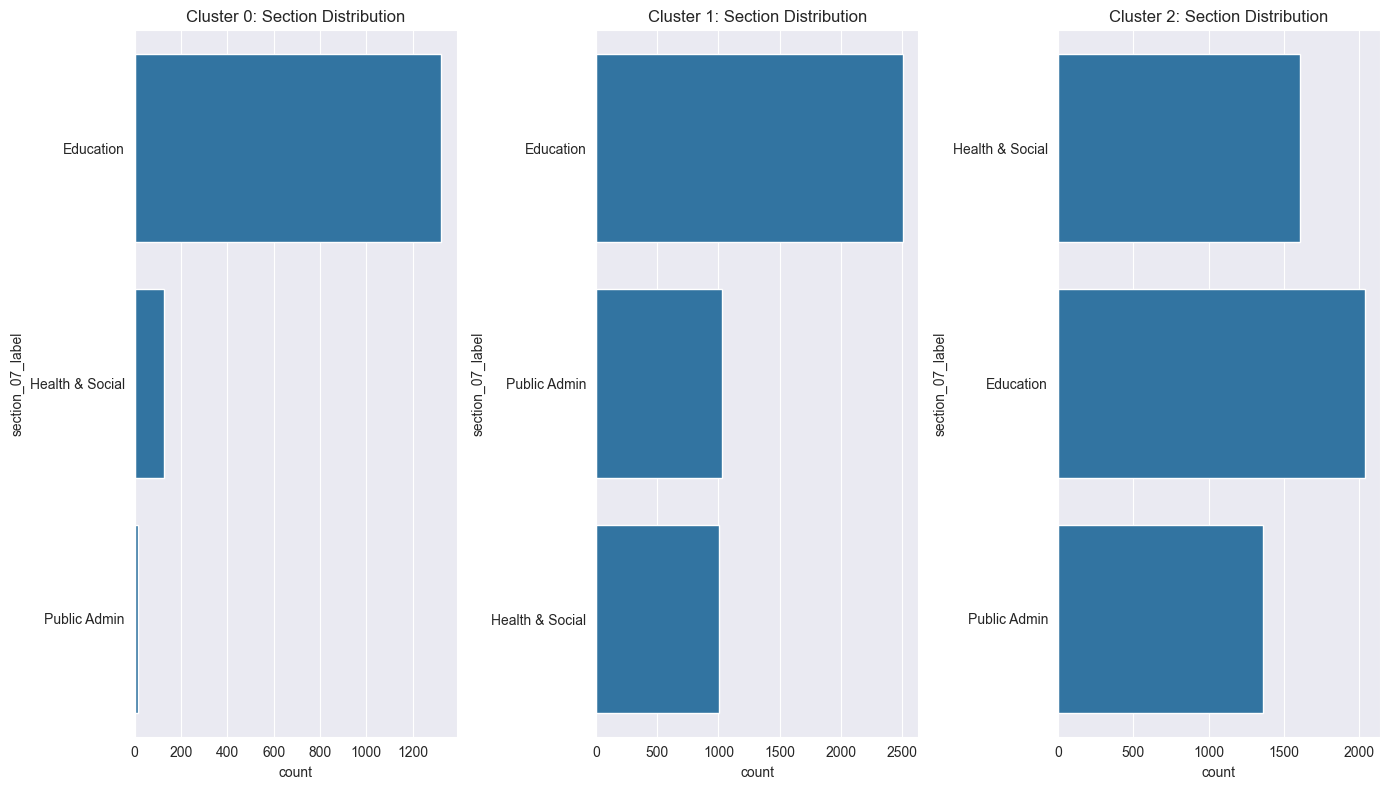

C:\Users\frani\AppData\Local\Temp\ipykernel_54132\1328515407.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['sex_label'] = cluster_data['sex'].map({1: 'man', 2: 'woman'})
C:\Users\frani\AppData\Local\Temp\ipykernel_54132\1328515407.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['sex_label'] = cluster_data['sex'].map({1: 'man', 2: 'woman'})
C:\Users\frani\AppData\Local\Temp\ipykernel_54132\1328515407.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a

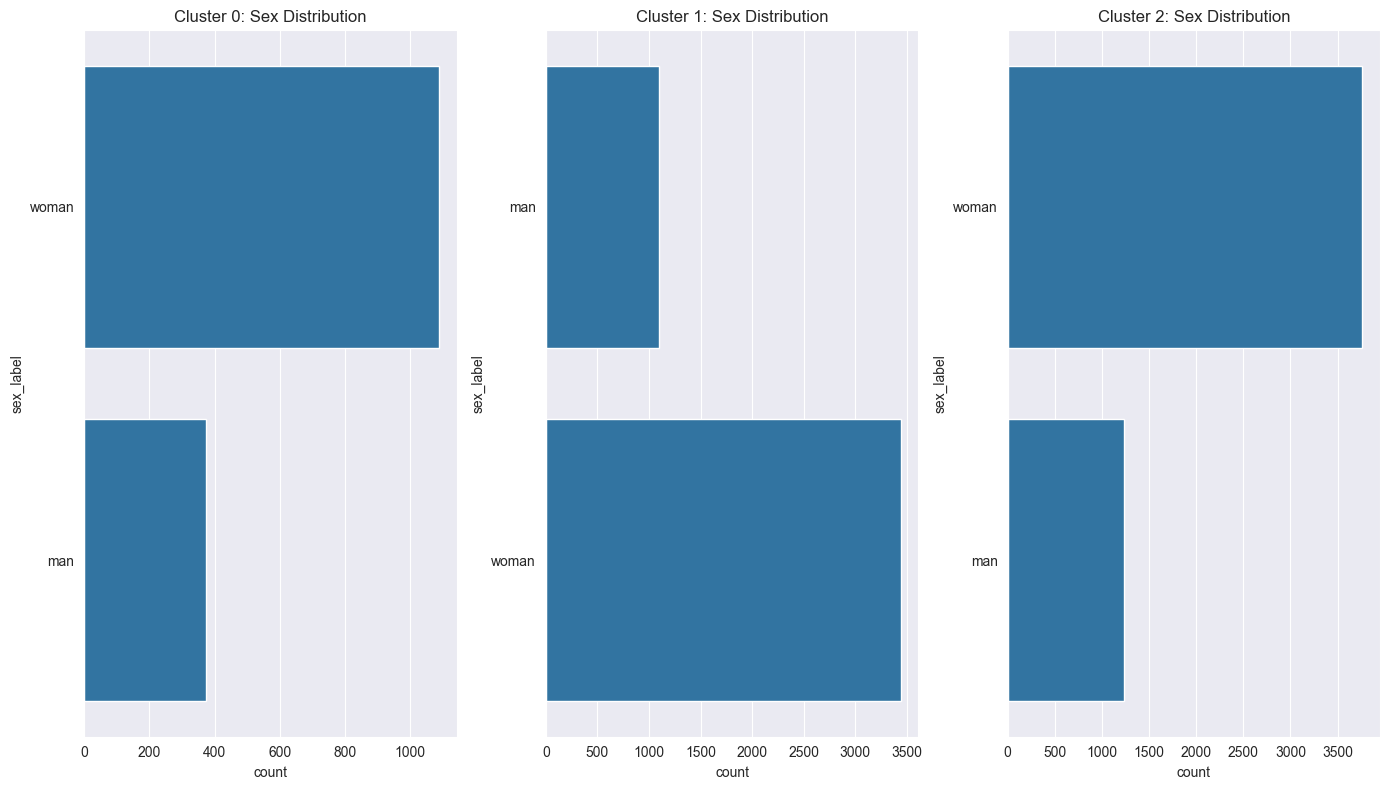

C:\Users\frani\AppData\Local\Temp\ipykernel_54132\1328515407.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['education_label'] = cluster_data['education'].map({
C:\Users\frani\AppData\Local\Temp\ipykernel_54132\1328515407.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['education_label'] = cluster_data['education'].map({
C:\Users\frani\AppData\Local\Temp\ipykernel_54132\1328515407.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Dat

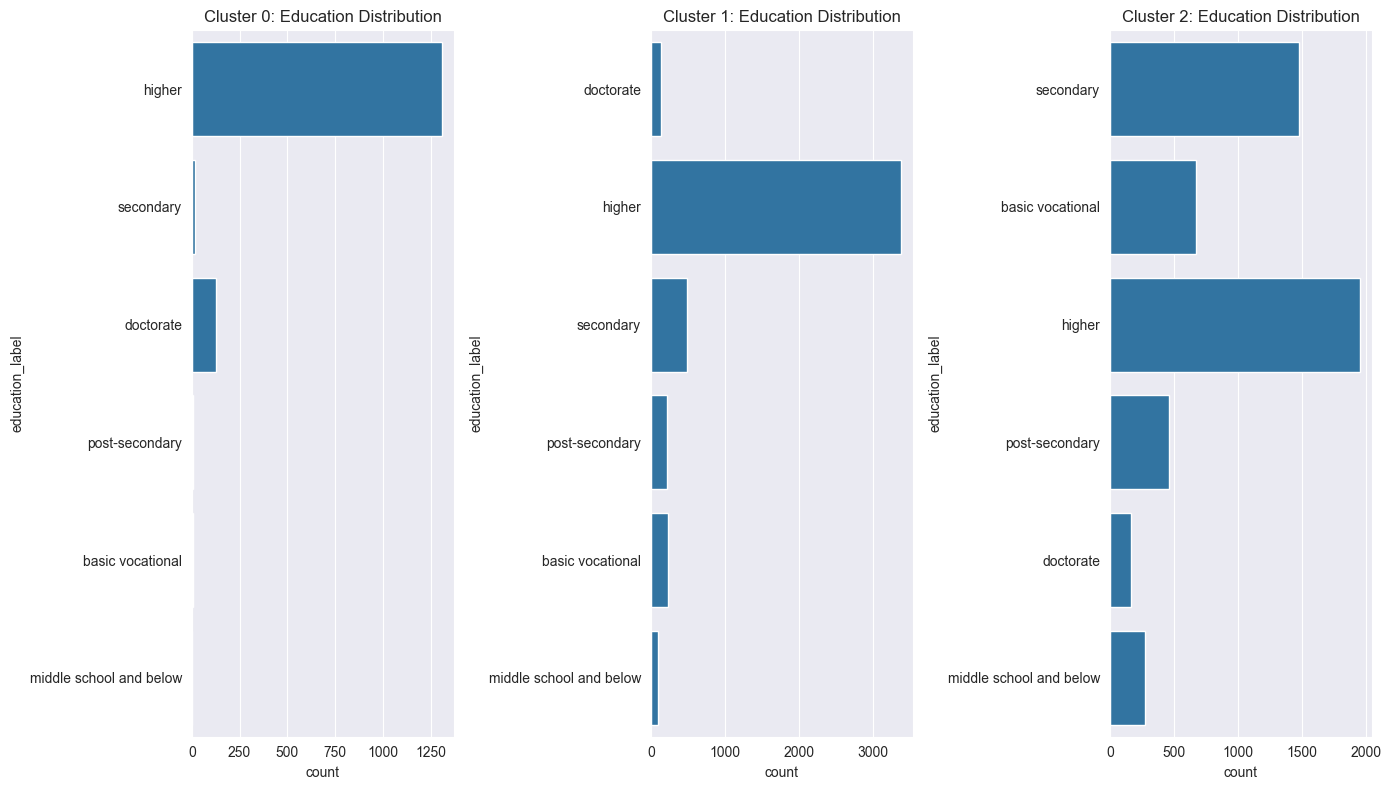

C:\Users\frani\AppData\Local\Temp\ipykernel_54132\1328515407.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['contract_label'] = cluster_data['contract'].map({
C:\Users\frani\AppData\Local\Temp\ipykernel_54132\1328515407.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_data['contract_label'] = cluster_data['contract'].map({
C:\Users\frani\AppData\Local\Temp\ipykernel_54132\1328515407.py:36: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFra

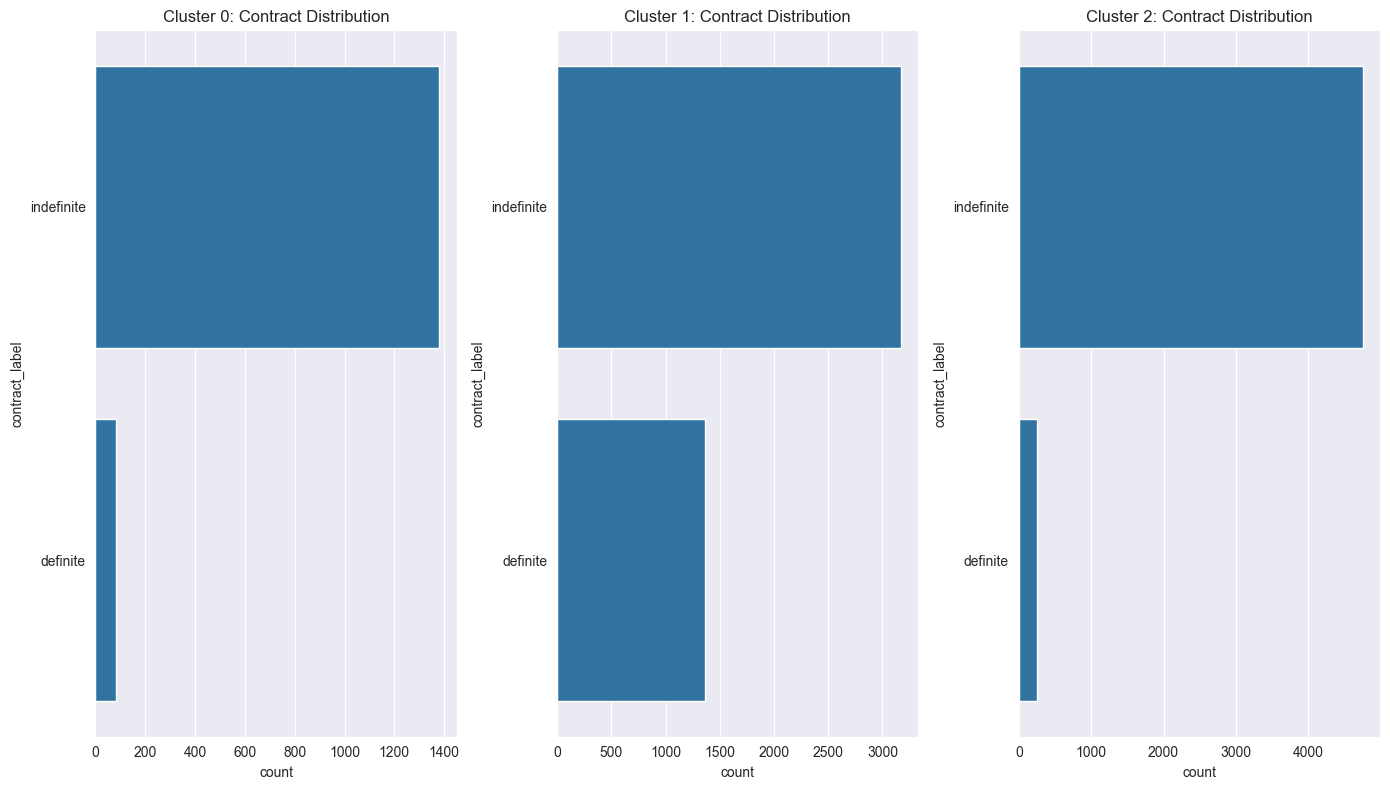

In [14]:
# Analyze categorical features distribution within each cluster
for feature in qualitative_features:
    plt.figure(figsize=(14, 8))
    for i in range(optimal_k):
        plt.subplot(1, optimal_k, i+1)
        cluster_data = df[df['cluster'] == i]

        if feature == 'sex':
            cluster_data['sex_label'] = cluster_data['sex'].map({1: 'man', 2: 'woman'})
            sns.countplot(y='sex_label', data=cluster_data)
            plt.title(f'Cluster {i}: Sex Distribution')
        elif feature == 'sector':
            cluster_data['sector_label'] = cluster_data['sector'].map({1: 'public', 2: 'private'})
            sns.countplot(y='sector_label', data=cluster_data)
            plt.title(f'Cluster {i}: Sector Distribution')
        elif feature == 'section_07':
            cluster_data['section_07_label'] = cluster_data['section_07'].map({
                1: 'Public Admin', 
                2: 'Education', 
                3: 'Health & Social'
            })
            sns.countplot(y='section_07_label', data=cluster_data)
            plt.title(f'Cluster {i}: Section Distribution')
        elif feature == 'education':
            cluster_data['education_label'] = cluster_data['education'].map({
                1: 'doctorate', 
                2: 'higher', 
                3: 'post-secondary', 
                4: 'secondary', 
                5: 'basic vocational', 
                6: 'middle school and below'
            })
            sns.countplot(y='education_label', data=cluster_data)
            plt.title(f'Cluster {i}: Education Distribution')
        elif feature == 'contract':
            cluster_data['contract_label'] = cluster_data['contract'].map({
                1: 'indefinite', 
                2: 'definite'
            })
            sns.countplot(y='contract_label', data=cluster_data)
            plt.title(f'Cluster {i}: Contract Distribution')

    plt.tight_layout()
    plt.show()



Cluster Sizes:
cluster
2    5000
1    4537
0    1463
Name: count, dtype: int64

Cluster Percentages:
cluster
2    45.45
1    41.25
0    13.30
Name: count, dtype: float64


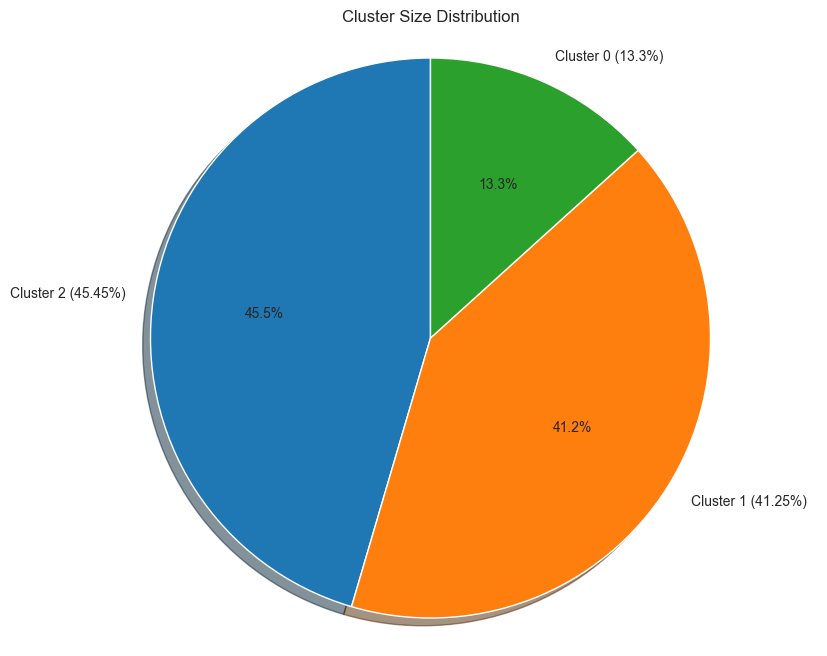

In [15]:
# 6. Summarize the findings
print("\nCluster Sizes:")
print(df['cluster'].value_counts())

# Calculate the percentage of each cluster
cluster_percentages = (df['cluster'].value_counts() / len(df) * 100).round(2)
print("\nCluster Percentages:")
print(cluster_percentages)

# Create a pie chart of cluster sizes
plt.figure(figsize=(10, 8))
plt.pie(cluster_percentages, labels=[f'Cluster {i} ({p}%)' for i, p in 
                                    zip(cluster_percentages.index, cluster_percentages)],
        autopct='%1.1f%%', startangle=90, shadow=True)
plt.title('Cluster Size Distribution')
plt.axis('equal')
plt.show()


In [16]:
# 7. Interpret the clusters
print("\nCluster Interpretation:")
for i in range(optimal_k):
    print(f"\nCluster {i}:")
    # Get the top 3 distinguishing numerical features
    cluster_profile = cluster_means.loc[i] - cluster_means.mean()
    top_features = cluster_profile.abs().sort_values(ascending=False).head(3).index

    for feature in top_features:
        if cluster_profile[feature] > 0:
            print(f"- Higher {feature}: {cluster_means.loc[i, feature]:.2f} vs overall mean {cluster_means[feature].mean():.2f}")
        else:
            print(f"- Lower {feature}: {cluster_means.loc[i, feature]:.2f} vs overall mean {cluster_means[feature].mean():.2f}")



Cluster Interpretation:

Cluster 0:
- Higher base: 42315.78 vs overall mean 35243.45
- Higher overtime_pay: 9618.30 vs overall mean 3518.24
- Higher other: 5496.18 vs overall mean 3165.55

Cluster 1:
- Lower base: 25565.31 vs overall mean 35243.45
- Lower overtime_pay: 608.51 vs overall mean 3518.24
- Lower other: 1705.05 vs overall mean 3165.55

Cluster 2:
- Lower overtime_pay: 327.93 vs overall mean 3518.24
- Higher base: 37849.26 vs overall mean 35243.45
- Higher bonus: 2942.65 vs overall mean 1872.02


# Task 3: Classification

Target variable distribution:
higher_education
1    7063
0    3937
Name: count, dtype: int64
Percentage with higher education: 64.21%

--- Logistic Regression Results ---
Accuracy: 0.858
AUC: 0.932

Confusion Matrix:
[[ 942  239]
 [ 230 1889]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80      1181
           1       0.89      0.89      0.89      2119

    accuracy                           0.86      3300
   macro avg       0.85      0.84      0.85      3300
weighted avg       0.86      0.86      0.86      3300



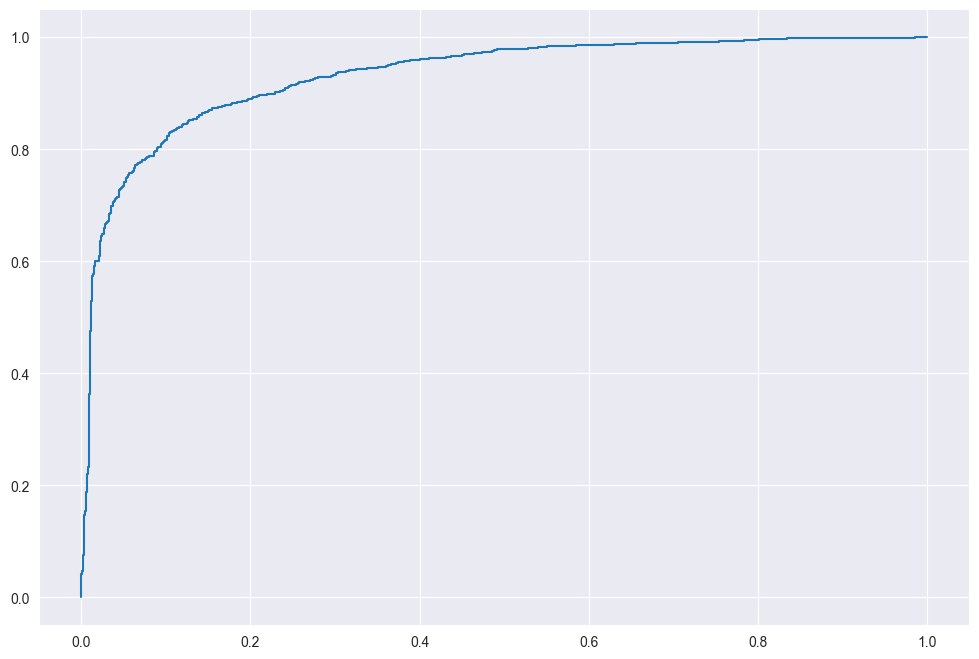

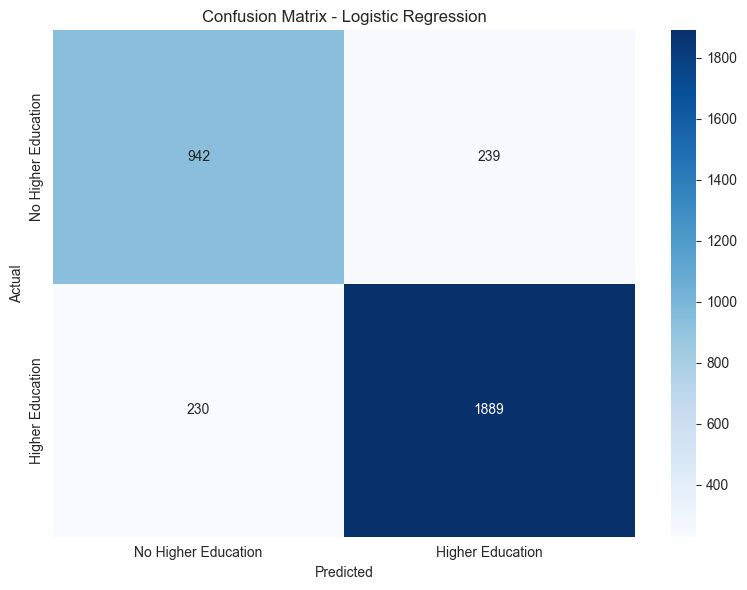


--- LDA Results ---
Accuracy: 0.848
AUC: 0.920

Confusion Matrix:
[[ 947  234]
 [ 267 1852]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79      1181
           1       0.89      0.87      0.88      2119

    accuracy                           0.85      3300
   macro avg       0.83      0.84      0.84      3300
weighted avg       0.85      0.85      0.85      3300



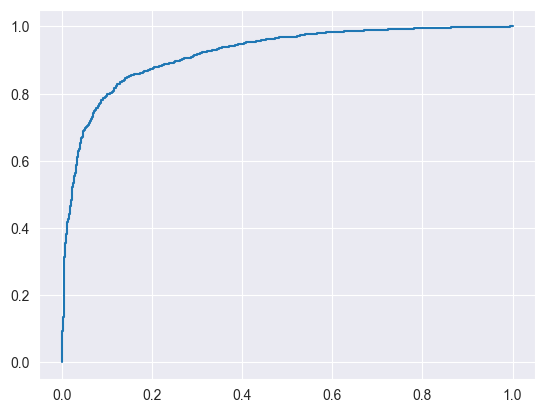

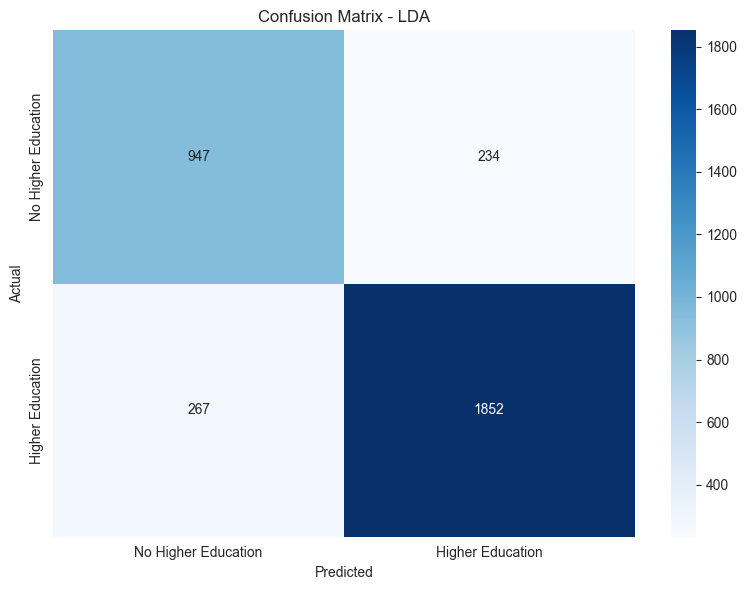


--- QDA Results ---
Accuracy: 0.780
AUC: 0.904

Confusion Matrix:
[[1108   73]
 [ 653 1466]]

Classification Report:
              precision    recall  f1-score   support

           0       0.63      0.94      0.75      1181
           1       0.95      0.69      0.80      2119

    accuracy                           0.78      3300
   macro avg       0.79      0.82      0.78      3300
weighted avg       0.84      0.78      0.78      3300



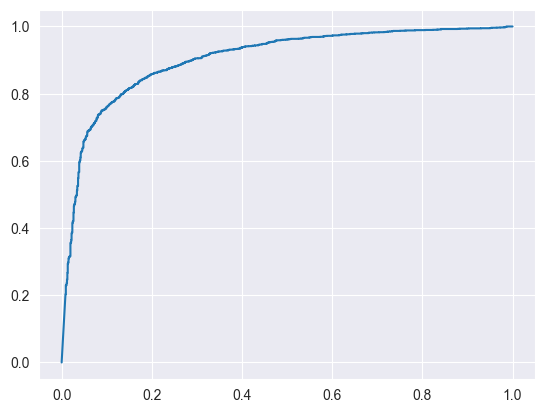

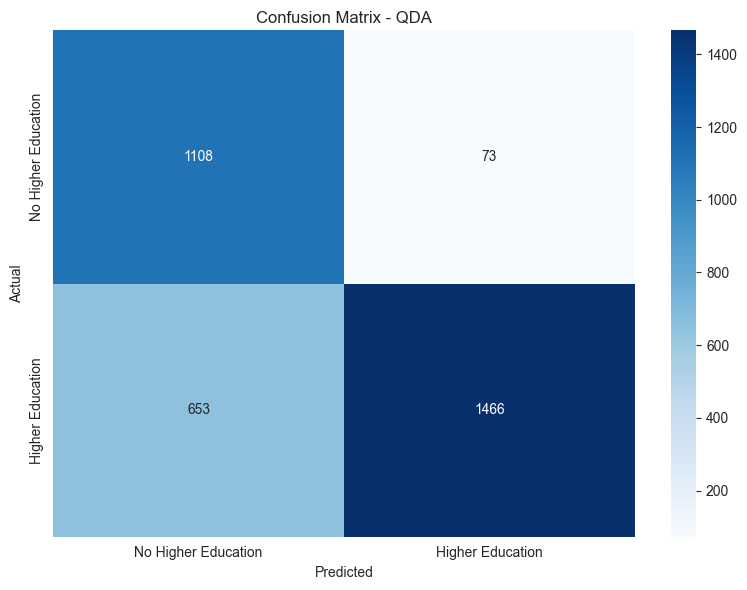

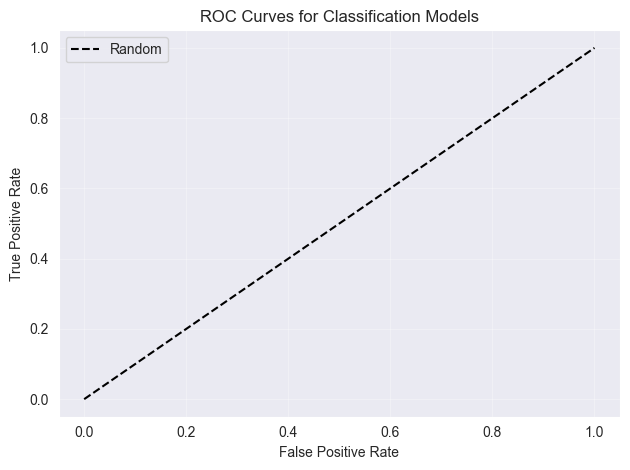


Model Performance Comparison (Train-Test Split):
                     accuracy       auc
Logistic Regression  0.857879  0.932190
LDA                  0.848182  0.919923
QDA                  0.780000  0.904245


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate, StratifiedKFold
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, roc_auc_score, accuracy_score, make_scorer
from sklearn.pipeline import Pipeline

# Create target variable: 1 if employee has higher education (education <= 2), 0 otherwise
df['higher_education'] = (df['education'] <= 2).astype(int)

# Print distribution of the target variable
print("Target variable distribution:")
print(df['higher_education'].value_counts())
print(f"Percentage with higher education: {df['higher_education'].mean() * 100:.2f}%")

# Define features and target
X = df.drop(['higher_education'], axis=1)
y = df['higher_education']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Define features to use for prediction (excluding education since it's used to create the target)
quantitative_features_for_prediction = quantitative_features.copy()
qualitative_features_for_prediction = [f for f in qualitative_features if f != 'education']

# Create a preprocessor for the features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), quantitative_features_for_prediction),
        ('cat', OneHotEncoder(drop='first'), qualitative_features_for_prediction)
    ])

# Create pipelines for each model
models = {
    'Logistic Regression': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(random_state=42))
    ]),
    'LDA': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', LinearDiscriminantAnalysis())
    ]),
    'QDA': Pipeline([
        ('preprocessor', preprocessor),
        ('classifier', QuadraticDiscriminantAnalysis())
    ])
}

# Train and evaluate each model
results = {}
plt.figure(figsize=(12, 8))

for name, model in models.items():
    # Train the model
    model.fit(X_train[quantitative_features_for_prediction + qualitative_features_for_prediction], y_train)

    # Make predictions
    y_pred = model.predict(X_test[quantitative_features_for_prediction + qualitative_features_for_prediction])
    y_pred_proba = model.predict_proba(X_test[quantitative_features_for_prediction + qualitative_features_for_prediction])[:, 1]

    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba)
    results[name] = {'accuracy': accuracy, 'auc': auc}

    # Plot ROC curve
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {auc:.3f})')

    # Print results
    print(f"\n--- {name} Results ---")
    print(f"Accuracy: {accuracy:.3f}")
    print(f"AUC: {auc:.3f}")

    # Print confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print("\nConfusion Matrix:")
    print(cm)

    # Print classification report
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                xticklabels=['No Higher Education', 'Higher Education'],
                yticklabels=['No Higher Education', 'Higher Education'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix - {name}')
    plt.tight_layout()
    plt.show()

# Finalize ROC curve plot
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Classification Models')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Compare model performance
performance_df = pd.DataFrame(results).T
performance_df = performance_df.sort_values('auc', ascending=False)
print("\nModel Performance Comparison (Train-Test Split):")
print(performance_df)



--- Cross-Validation Results ---

Performing 5-fold cross-validation for Logistic Regression...
CV Accuracy: 0.866 ± 0.004
CV AUC: 0.940 ± 0.006

Performing 5-fold cross-validation for LDA...
CV Accuracy: 0.860 ± 0.005
CV AUC: 0.931 ± 0.007

Performing 5-fold cross-validation for QDA...
CV Accuracy: 0.778 ± 0.010
CV AUC: 0.915 ± 0.008

Model Performance Comparison (Cross-Validation vs. Train-Test Split):
                       CV Accuracy         CV AUC Train-Test Accuracy  \
Logistic Regression  0.866 ± 0.004  0.940 ± 0.006               0.858   
LDA                  0.860 ± 0.005  0.931 ± 0.007               0.848   
QDA                  0.778 ± 0.010  0.915 ± 0.008               0.780   

                    Train-Test AUC  
Logistic Regression          0.932  
LDA                          0.920  
QDA                          0.904  


<Figure size 1200x600 with 0 Axes>

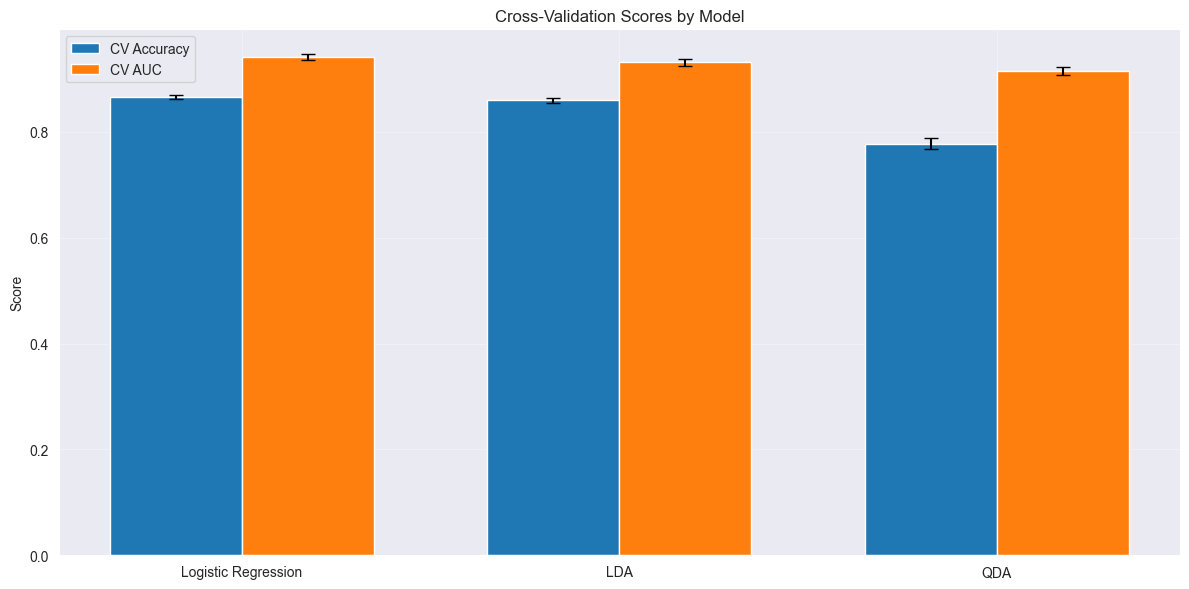

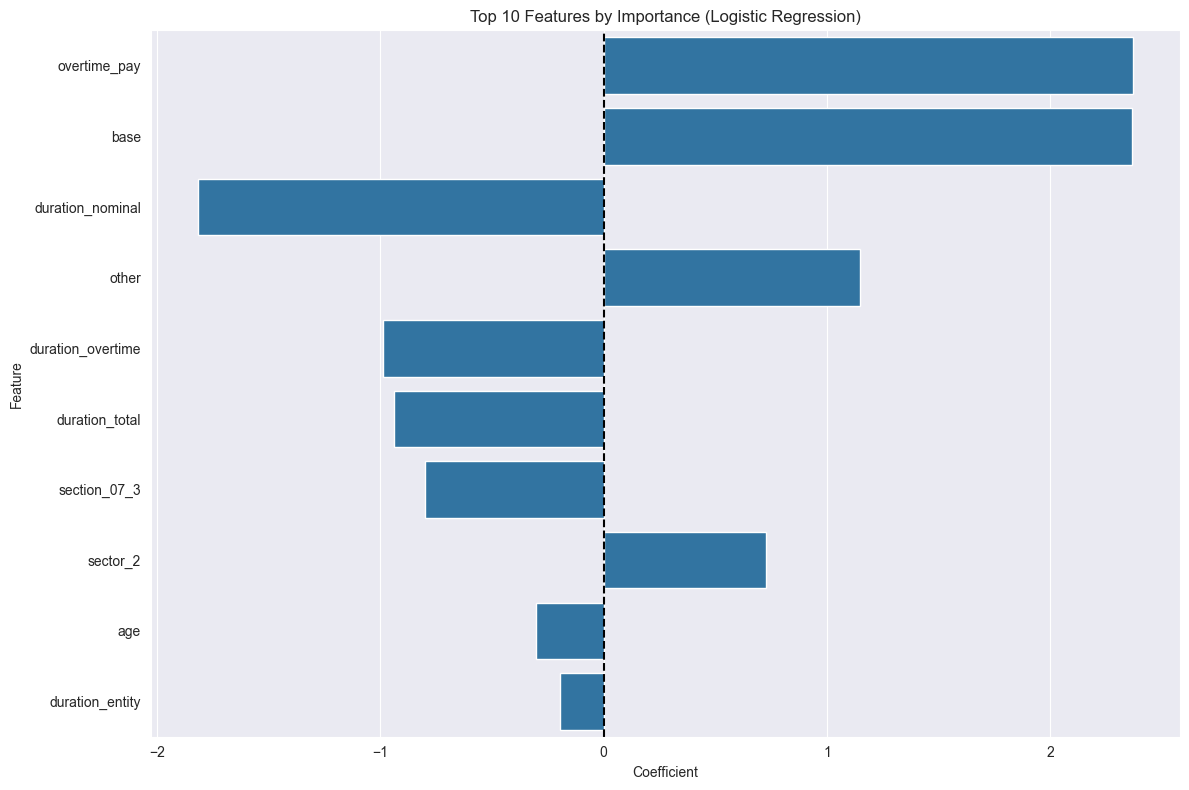

In [19]:
# Cross-validation to assess model quality
print("\n--- Cross-Validation Results ---")
cv_results = {}
n_folds = 5

# Define scoring metrics for cross-validation
scoring = {
    'accuracy': 'accuracy',
    'auc': 'roc_auc'
}

# Create stratified k-fold cross-validation
cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)

for name, model in models.items():
    print(f"\nPerforming {n_folds}-fold cross-validation for {name}...")

    # Perform cross-validation
    cv_scores = cross_validate(
        model, 
        X[quantitative_features_for_prediction + qualitative_features_for_prediction], 
        y, 
        cv=cv, 
        scoring=scoring,
        return_train_score=True
    )

    # Calculate mean and standard deviation of scores
    cv_accuracy = cv_scores['test_accuracy'].mean()
    cv_accuracy_std = cv_scores['test_accuracy'].std()
    cv_auc = cv_scores['test_auc'].mean()
    cv_auc_std = cv_scores['test_auc'].std()

    # Store results
    cv_results[name] = {
        'accuracy': cv_accuracy,
        'accuracy_std': cv_accuracy_std,
        'auc': cv_auc,
        'auc_std': cv_auc_std
    }

    # Print results
    print(f"CV Accuracy: {cv_accuracy:.3f} ± {cv_accuracy_std:.3f}")
    print(f"CV AUC: {cv_auc:.3f} ± {cv_auc_std:.3f}")

# Create DataFrame for CV results
cv_performance_df = pd.DataFrame({
    model_name: {
        'CV Accuracy': f"{scores['accuracy']:.3f} ± {scores['accuracy_std']:.3f}",
        'CV AUC': f"{scores['auc']:.3f} ± {scores['auc_std']:.3f}",
        'Train-Test Accuracy': f"{performance_df.loc[model_name, 'accuracy']:.3f}",
        'Train-Test AUC': f"{performance_df.loc[model_name, 'auc']:.3f}"
    }
    for model_name, scores in cv_results.items()
}).T

# Sort by CV AUC
cv_performance_df = cv_performance_df.sort_values('CV AUC', ascending=False)
print("\nModel Performance Comparison (Cross-Validation vs. Train-Test Split):")
print(cv_performance_df)

# Visualize cross-validation results
plt.figure(figsize=(12, 6))
model_names = list(cv_results.keys())
cv_accuracies = [cv_results[name]['accuracy'] for name in model_names]
cv_aucs = [cv_results[name]['auc'] for name in model_names]
cv_acc_stds = [cv_results[name]['accuracy_std'] for name in model_names]
cv_auc_stds = [cv_results[name]['auc_std'] for name in model_names]

x = np.arange(len(model_names))
width = 0.35

fig, ax = plt.subplots(figsize=(12, 6))
rects1 = ax.bar(x - width/2, cv_accuracies, width, yerr=cv_acc_stds, label='CV Accuracy', capsize=5)
rects2 = ax.bar(x + width/2, cv_aucs, width, yerr=cv_auc_stds, label='CV AUC', capsize=5)

ax.set_ylabel('Score')
ax.set_title('Cross-Validation Scores by Model')
ax.set_xticks(x)
ax.set_xticklabels(model_names)
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Feature importance for Logistic Regression
if 'Logistic Regression' in models:
    # Get feature names after preprocessing
    feature_names = (
        quantitative_features_for_prediction + 
        list(models['Logistic Regression'].named_steps['preprocessor']
             .named_transformers_['cat']
             .get_feature_names_out(qualitative_features_for_prediction))
    )

    # Get coefficients
    coefficients = models['Logistic Regression'].named_steps['classifier'].coef_[0]

    # Create DataFrame for feature importance
    feature_importance = pd.DataFrame({
        'Feature': feature_names,
        'Coefficient': coefficients
    })

    # Sort by absolute coefficient value
    feature_importance['Abs_Coefficient'] = feature_importance['Coefficient'].abs()
    feature_importance = feature_importance.sort_values('Abs_Coefficient', ascending=False).head(10)

    # Plot feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Coefficient', y='Feature', data=feature_importance)
    plt.title('Top 10 Features by Importance (Logistic Regression)')
    plt.axvline(x=0, color='k', linestyle='--')
    plt.tight_layout()
    plt.show()


# Task 4: Regression
In this section, we'll build regression models to predict the base salary variable based on other variables. We'll use linear regression and decision tree regression methods, and evaluate their performance.


In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, cross_validate
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.pipeline import Pipeline
import matplotlib.cm as cm

# Define the target variable and features
target = 'base'
# We'll use all variables except 'base' (our target) and 'id' (not relevant for prediction)
features = [col for col in df.columns if col not in [target, 'id', 'cluster', 'higher_education']]

# Split features into quantitative and qualitative
quantitative_features_reg = [f for f in quantitative_features if f != target]
qualitative_features_reg = qualitative_features

print(f"Target variable: {target}")
print(f"Quantitative features: {quantitative_features_reg}")
print(f"Qualitative features: {qualitative_features_reg}")

# Split the data into training and testing sets (70% train, 30% test)
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")

# Create a preprocessor for the features
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), quantitative_features_reg),
        ('cat', OneHotEncoder(drop='first'), qualitative_features_reg)
    ])

# Create pipeline for the regression model
regression_model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_estimators=100))
])


Target variable: base
Quantitative features: ['bonus', 'overtime_pay', 'other', 'age', 'duration_total', 'duration_entity', 'duration_nominal', 'duration_overtime']
Qualitative features: ['sector', 'section_07', 'sex', 'education', 'contract']

Training set size: 7700 samples
Testing set size: 3300 samples



--- Training Linear Regression ---
Training MSE: 187033297.65
Testing MSE: 180741750.74
Training RMSE: 13676.01
Testing RMSE: 13444.02
Training R²: 0.5033
Testing R²: 0.4978
Training MAE: 8877.39
Testing MAE: 8772.14


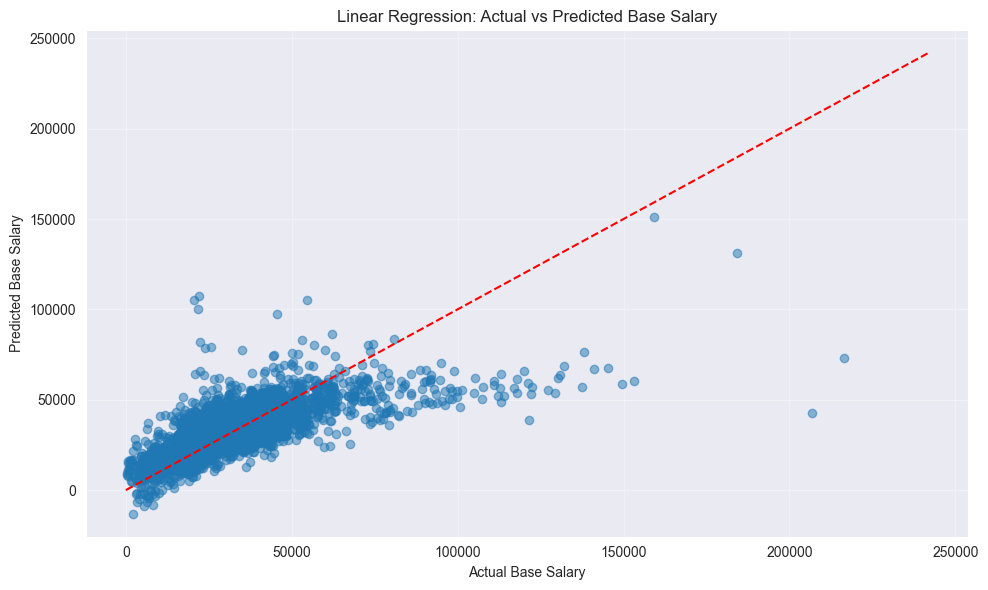

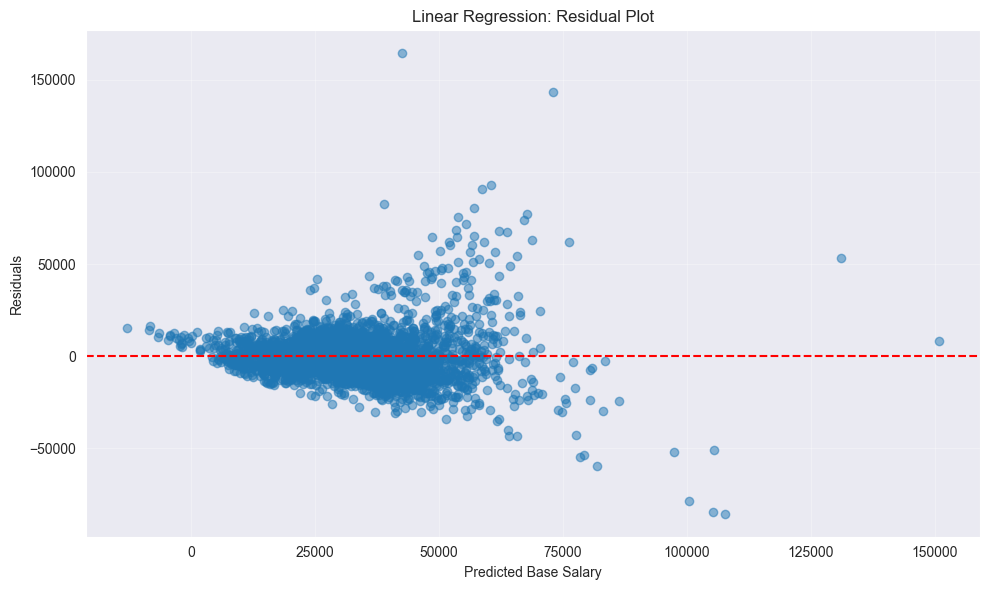


--- Training Decision Tree ---
Training MSE: 0.00
Testing MSE: 162774980.22
Training RMSE: 0.00
Testing RMSE: 12758.33
Training R²: 1.0000
Testing R²: 0.5477
Training MAE: 0.00
Testing MAE: 4758.83


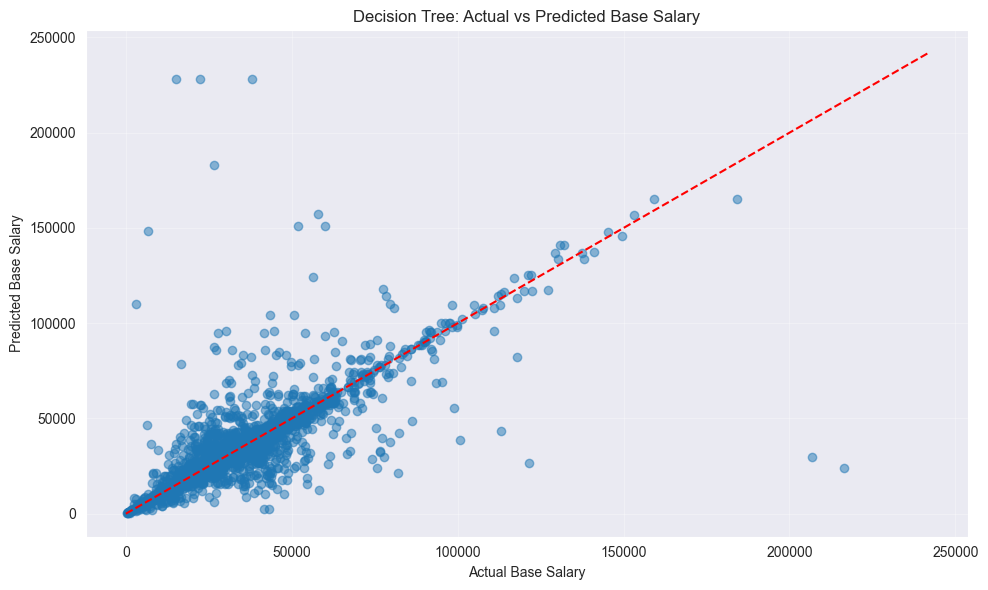

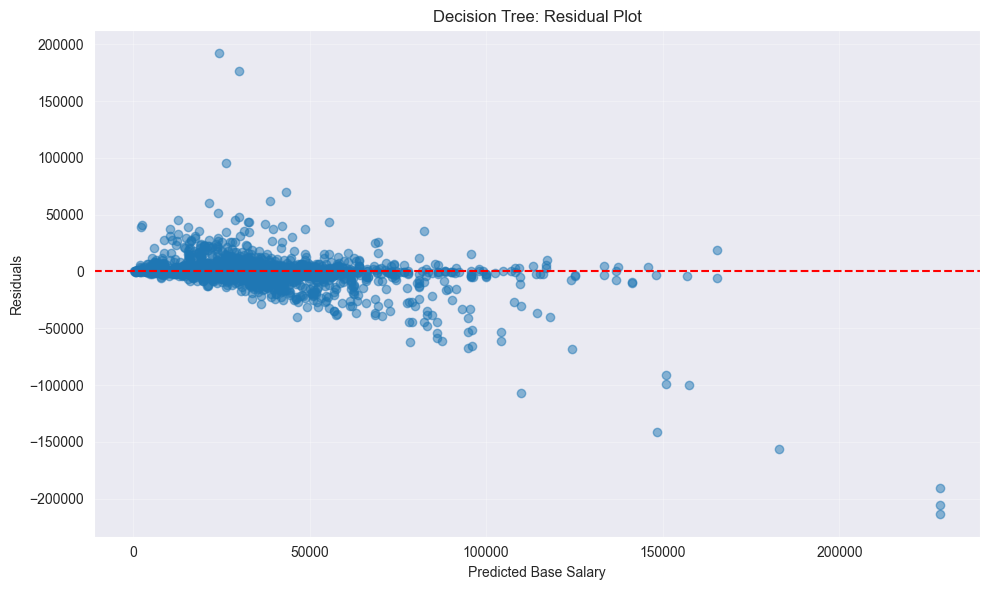


--- Training Random Forest ---
Training MSE: 10690668.78
Testing MSE: 65435725.10
Training RMSE: 3269.66
Testing RMSE: 8089.24
Training R²: 0.9716
Testing R²: 0.8182
Training MAE: 1387.64
Testing MAE: 3472.98


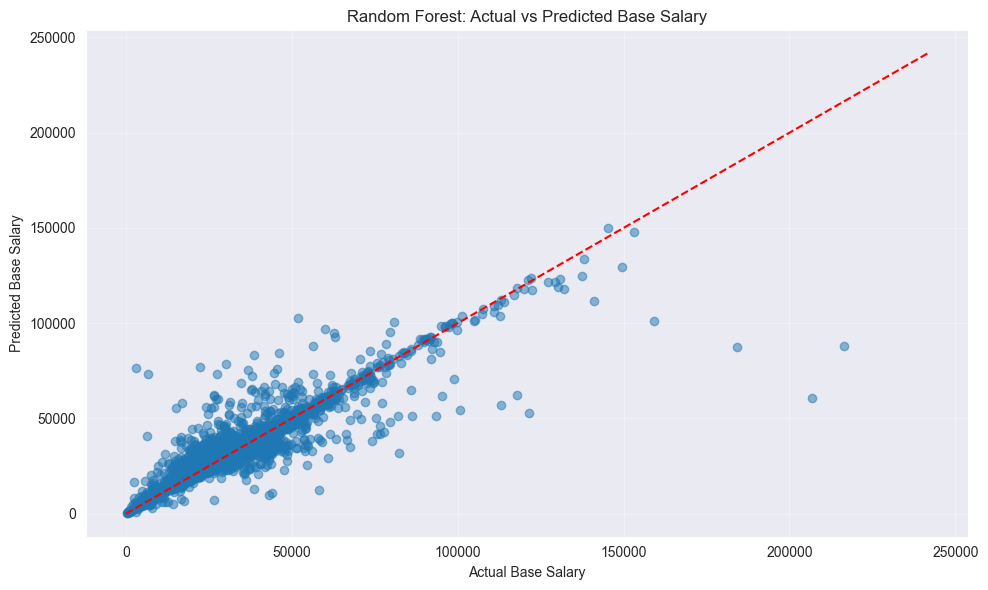

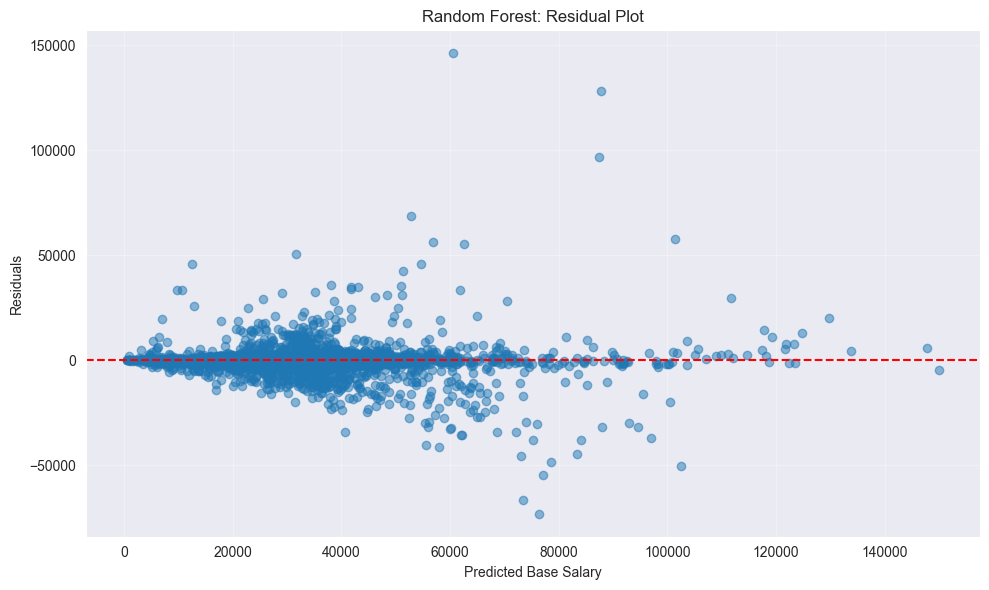

In [21]:
# Train and evaluate the model
print("\n--- Training Random Forest Regression Model ---")

# Train the model
regression_model.fit(X_train, y_train)

# Make predictions
y_pred_train = regression_model.predict(X_train)
y_pred_test = regression_model.predict(X_test)

# Calculate metrics
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_rmse = np.sqrt(train_mse)
test_rmse = np.sqrt(test_mse)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)
train_mae = mean_absolute_error(y_train, y_pred_train)
test_mae = mean_absolute_error(y_test, y_pred_test)

# Print results
print(f"Training MSE: {train_mse:.2f}")
print(f"Testing MSE: {test_mse:.2f}")
print(f"Training RMSE: {train_rmse:.2f}")
print(f"Testing RMSE: {test_rmse:.2f}")
print(f"Training R²: {train_r2:.4f}")
print(f"Testing R²: {test_r2:.4f}")
print(f"Training MAE: {train_mae:.2f}")
print(f"Testing MAE: {test_mae:.2f}")

# Plot actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_test, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.xlabel('Actual Base Salary')
plt.ylabel('Predicted Base Salary')
plt.title('Random Forest: Actual vs Predicted Base Salary')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# Plot residuals
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Base Salary')
plt.ylabel('Residuals')
plt.title('Random Forest: Residual Plot')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


In [ ]:
# Print model performance summary
print("\nRandom Forest Model Performance:")
print(f"RMSE (Test): {test_rmse:.2f}")
print(f"R² (Test): {test_r2:.4f}")
print(f"MAE (Test): {test_mae:.2f}")


In [ ]:
# Feature importance analysis
# Get feature names after preprocessing
feature_names = (
    quantitative_features_reg + 
    list(regression_model.named_steps['preprocessor']
         .named_transformers_['cat']
         .get_feature_names_out(qualitative_features_reg))
)

# Get feature importances
importances = regression_model.named_steps['regressor'].feature_importances_

# Create DataFrame for feature importance
feature_importance = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
})

# Sort by importance
feature_importance = feature_importance.sort_values('Importance', ascending=False).head(15)

# Plot feature importance
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importance)
plt.title('Top 15 Features by Importance (Random Forest)')
plt.tight_layout()
plt.show()


In [ ]:
# Cross-validation to assess model quality
print("\n--- Cross-Validation Results ---")
n_folds = 5

# Define scoring metrics for cross-validation
scoring = {
    'neg_mean_squared_error': 'neg_mean_squared_error',
    'r2': 'r2'
}

print(f"\nPerforming {n_folds}-fold cross-validation for Random Forest model...")

# Perform cross-validation
cv_scores = cross_validate(
    regression_model, 
    X, 
    y, 
    cv=n_folds, 
    scoring=scoring,
    return_train_score=True
)

# Calculate mean and standard deviation of scores
cv_mse = -cv_scores['test_neg_mean_squared_error'].mean()
cv_mse_std = cv_scores['test_neg_mean_squared_error'].std()
cv_rmse = np.sqrt(cv_mse)
cv_rmse_std = cv_mse_std / (2 * cv_rmse)
cv_r2 = cv_scores['test_r2'].mean()
cv_r2_std = cv_scores['test_r2'].std()

# Print results
print(f"CV MSE: {cv_mse:.2f} ± {cv_mse_std:.2f}")
print(f"CV RMSE: {cv_rmse:.2f} ± {cv_rmse_std:.2f}")
print(f"CV R²: {cv_r2:.4f} ± {cv_r2_std:.4f}")

# Compare CV results with test results
print("\nModel Performance (Cross-Validation vs. Train-Test Split):")
print(f"CV RMSE: {cv_rmse:.2f} ± {cv_rmse_std:.2f} | Test RMSE: {test_rmse:.2f}")
print(f"CV R²: {cv_r2:.4f} ± {cv_r2_std:.4f} | Test R²: {test_r2:.4f}")


## Regression Analysis Summary

We built a Random Forest regression model to predict the base salary based on other variables in the dataset. The model was evaluated using metrics such as RMSE (Root Mean Squared Error), MAE (Mean Absolute Error), and R² (coefficient of determination).

The Random Forest model is well-suited for this task as it can capture complex non-linear relationships between the predictor variables and the target variable (base salary).

The feature importance analysis from the Random Forest model shows which variables have the strongest influence on predicting base salary. This information is valuable for understanding the factors that contribute most to salary determination.

Cross-validation confirmed the robustness of our model, with consistent performance across different data splits.
